# Mid Bootcamp Project: Movie Analysis

This project is a movie analysis based on data from IMDb.com, incorporating a large sample of movies I have seen. The goal is to explore data science tools learned in the bootcamp and have fun with the data. The ultimate goal is to create a recommendation system for movies based on my taste.

## Table of Contents
I. [Data Extraction](#data-extraction)

1. [Web scraping movies watched](###web-scraping-movies-watched)

2. [Kaggle API IMDb dataset](###kaggle-api-imdb-dataset)

II. [Data Wrangling](#data-wrangling)

1. [Storing on MongoDB database](###storing-on-mongodb-database)

III. [Exploratory Data Analysis (EDA)](###exploratory-data-analysis-eda)

IV. [Data Preprocessing & Feature Engineering](###data-preprocessing-&-feature-engineering)

V. [Data Transformation](###data-transformation)

1.  [One Hot Encoding](####one-hot-encoding)

VI. [Visualizations](#visualizations)

1.  [General overview](##general-overview)

      a.  [Runtime](###runtime)

      b.  [Genres](###genres)

      c.  [Actors](###actors)
      
      d.  [Hypothesis Testing](#hypothesis-testing)

      e.  [Directors](###directors)

      f.  [Top Movies](###top-movies)

2. [Custom Overview: My Watched Movies](##custom-overview)

      a. [Top Actors](###top-actors)

      b. [Rating Distribution](###rating-distribution)

      c. [Movies and genres watched over time](###movies-and-genres-watched-over-time)
            
VII. [Recommendation System](#recommendation-system)

1. [Priliminary tests with easy vectorisers](###priliminary-tests-with-easy-vectorisers)

2. [Advanced testing with Qdrant](###advanced-testing-with-qdrant)

3. [Mid complexity approach](###mid-complexity-approach)

      a. [Tokenisation & Vectorisation (Embeddings)](####tokenisation-&-vectorisation-(embeddings))

      b. [Stop words](####stop-words)

      c. [Cosine similarity](####cosine-similarity)

      d. [PCA](####pca)

      e. [Scatterplot](####scatterplot)

# Data Extraction

### Web scraping movies watched

Let's first gather the movies that I've watched 

I've kept track of the movies I watch since 2015 on Pinterest so it's quite handy for this project. https://www.pinterest.com/chaosskill/movies-watched/ I tried scraping the Pinterest board using BeautifulSoup, but with the lazy loading it has, it kept failing. 

I also wanted to check the Pinterest API but it's only for business accounts and I have a personal account. After some Googling, I found that Apify has a Pinterest crawler that can be used for free. Phew! 

So in a few minutes I easily scraped my Pinterest board following these instructions: https://blog.apify.com/how-to-scrape-data-on-pinterest-in-5-easy-steps/

(Full source code can be found here https://github.com/apify-alexey/pinterest-crawler)


In [300]:
import pandas as pd
pinterestdf = pd.read_csv('./data/raw/pinterest.csv')
# show all columns
pd.set_option('display.max_columns', None)
pinterestdf.head()

aggregated_pin_data/done  aggregated_pin_data/saves  alt_text  \
0                         0                          1       NaN   
1                         0                          3       NaN   
2                         0                          2       NaN   
3                         0                          1       NaN   
4                         0                          1       NaN   

           board/id                          board/image_thumbnail_url  \
0  9922130368142165  https://i.pinimg.com/upload/9922130368142165_b...   
1  9922130368138938  https://i.pinimg.com/upload/9922130368138938_b...   
2  9922130368138938  https://i.pinimg.com/upload/9922130368138938_b...   
3  9922130368142165  https://i.pinimg.com/upload/9922130368142165_b...   
4  9922130368142165  https://i.pinimg.com/upload/9922130368142165_b...   

   board/is_collaborative            board/name  \
0                   False  Movies to be watched   
1                   False        Movies watched   
2                   False        Movies watched   
3                   False  Movies to be watched   
4                   False  Movies to be watched   

                           board/url  carousel_data  comment_count  \
0  /chaosskill/movies-to-be-watched/            NaN            NaN   
1        /chaosskill/movies-watched/            NaN            NaN   
2        /chaosskill/movies-watched/            NaN            NaN   
3  /chaosskill/movies-to-be-watched/            NaN            NaN   
4  /chaosskill/movies-to-be-watched/            NaN            NaN   

   comments/bookmark  comments/data/0/commenter/ads_only_profile_site  \
0                NaN                                              NaN   
1                NaN                                              NaN   
2                NaN                                              NaN   
3                NaN                                              NaN   
4                NaN                                              NaN   

  comments/data/0/commenter/full_name  comments/data/0/commenter/id  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   

   comments/data/0/commenter/image_large_url  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   comments/data/0/commenter/image_small_url  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  comments/data/0/commenter/is_ads_only_profile  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  comments/data/0/commenter/username comments/data/0/created_at  \
0                                NaN                        NaN   
1                                NaN                        NaN   
2                                NaN                        NaN   
3                                NaN                        NaN   
4                                NaN                        NaN   

  comments/data/0/deletable_by_me  comments/data/0/id comments/data/0/text  \
0                             NaN                 NaN                  NaN   
1                             NaN                 NaN                  NaN   
2                             NaN

In [123]:
# list all columns 
pinterestdf.columns

Index(['aggregated_pin_data/done', 'aggregated_pin_data/saves', 'alt_text',
       'board/id', 'board/image_thumbnail_url', 'board/is_collaborative',
       'board/name', 'board/url', 'carousel_data', 'comment_count',
       'comments/bookmark', 'comments/data/0/commenter/ads_only_profile_site',
       'comments/data/0/commenter/full_name', 'comments/data/0/commenter/id',
       'comments/data/0/commenter/image_large_url',
       'comments/data/0/commenter/image_small_url',
       'comments/data/0/commenter/is_ads_only_profile',
       'comments/data/0/commenter/username', 'comments/data/0/created_at',
       'comments/data/0/deletable_by_me', 'comments/data/0/id',
       'comments/data/0/text', 'comments/uri', 'created_at', 'description',
       'description_html', 'domain', 'embed', 'grid_description', 'grid_title',
       'id', 'image/height', 'image/url', 'image/width', 'insertion_id',
       'is_eligible_for_pdp', 'is_native', 'is_oos_product', 'is_playable',
       'is_promoted',

It's a rather noisy dataset, let's just keep the columns that we're interested in

In [301]:
# keep only columns 'link', 'grid_title', 'created_at' and 'board/name'
pinterestdf = pinterestdf[['link','grid_title','created_at','board/name']]
pinterestdf = pinterestdf[pinterestdf['board/name'] == 'Movies watched']
pinterestdf = pinterestdf[['link','grid_title', 'created_at']]
pinterestdf['link'] = pinterestdf['link'].str.split('/').str[-2] # extracts id that matches imdb id as it was pinned from there 
pinterestdf['created_at'] = pd.to_datetime(pinterestdf['created_at'])
pinterestdf.drop_duplicates(subset=['link'], inplace=True)
pinterestdf.reset_index(drop=True, inplace=True)
pinterestdf.head()

link                                         grid_title  \
0   tt0317705                      The Incredibles (2004) - IMDb   
1   tt0120363                          Toy Story 2 (1999) - IMDb   
2   tt6710474    Everything Everywhere All at Once (2022) - IMDb   
3  tt13623136  The Guardians of the Galaxy Holiday Special (T...   
4   tt5848272            Ralph Breaks the Internet (2018) - IMDb   

                        created_at  
0  Fri, 07 Apr 2023 13:12:34 +0000  
1  Mon, 03 Apr 2023 07:24:24 +0000  
2  Tue, 14 Mar 2023 12:29:08 +0000  
3  Wed, 15 Feb 2023 08:13:32 +0000  
4  Wed, 15 Feb 2023 08:13:00 +0000

Here's the basic output showing all watched movies. 

### Kaggle API IMDb dataset

Now let's get the database of all movies from IMDB. This part was tricky as many databases are not complete or just messy. After some digging, I found quite a big database on Kaggle. https://www.kaggle.com/datasets/rajugc/imdb-movies-dataset-based-on-genre

I downloaded the data with the Kaggle API connection of my account (I could have also just downloaded the csv, but that's too easy). For safety reasons, I've hidden the API keys in a non version controlled file. 

In [1]:
import os
import requests
import json
from pathlib import Path

# Set up the Kaggle API
os.environ['KAGGLE_CONFIG_DIR'] = str(Path.home() / '.kaggle')

# Define the Kaggle dataset URL and API endpoint
dataset_url = 'https://www.kaggle.com/datasets/rajugc/imdb-movies-dataset-based-on-genre' 
api_url = f'https://www.kaggle.com/api/v1/datasets/download/{dataset_url.split("/")[-2]}/{dataset_url.split("/")[-1]}'

# Authenticate and download the dataset & Read the contents of the kaggle.json credentials file
with open('kaggle.json', 'r') as f:
    credentials = json.load(f)

api_username = credentials['username']
api_key = credentials['key']

response = requests.get(api_url, auth=requests.auth.HTTPBasicAuth(api_username, api_key))

# Save the dataset to a local file
with open('dataset.zip', 'wb') as f:
    f.write(response.content)

# unzip the dataset to the data/raw folder
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data/raw')

# Data Wrangling

The dataset is split in many files (per genre). Let's merge them into one dataframe. All of the headers are the same so this makes the task a lot easier

In [305]:
import pandas as pd
import glob
path = r'data/raw/dataset' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) 
    li.append(df)
moviesdf = pd.concat(li, axis=0, ignore_index=True)

In [307]:
# save the dataframe to a csv file
moviesdf.to_csv('./data/raw/moviesdf.csv', index=False)

In [306]:
moviesdf.head()

movie_id                         movie_name  year certificate  runtime  \
0  tt9114286     Black Panther: Wakanda Forever  2022       PG-13  161 min   
1  tt1630029           Avatar: The Way of Water  2022       PG-13  192 min   
2  tt5884796                              Plane  2023           R  107 min   
3  tt6710474  Everything Everywhere All at Once  2022           R  139 min   
4  tt5433140                             Fast X  2023         NaN      NaN   

                        genre  rating  \
0    Action, Adventure, Drama     6.9   
1  Action, Adventure, Fantasy     7.8   
2            Action, Thriller     6.5   
3   Action, Adventure, Comedy     8.0   
4      Action, Crime, Mystery     NaN   

                                         description  \
0  The people of Wakanda fight to protect their h...   
1  Jake Sully lives with his newfound family form...   
2  A pilot finds himself caught in a war zone aft...   
3  A middle-aged Chinese immigrant is swept up in...   
4  Dom Toretto and his family are targeted by the...   

                       director       director_id  \
0                  Ryan Coogler  /name/nm3363032/   
1                 James Cameron  /name/nm0000116/   
2          Jean-François Richet  /name/nm0724938/   
3  Dan Kwan, \nDaniel Scheinert  /name/nm3453283/   
4               Louis Leterrier  /name/nm0504642/   

                                                star  \
0  Letitia Wright, \nLupita Nyong'o, \nDanai Guri...   
1  Sam Worthington, \nZoe Saldana, \nSigourney We...   
2  Gerard Butler, \nMike Colter, \nTony Goldwyn, ...   
3  Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...   
4  Vin Diesel, \nJordana Brewster, \nTyrese Gibso...   

                                             star_id     votes  gross(in $)  
0  /name/nm4004793/,/name/nm2143282/,/name/nm1775...  204835.0          NaN  
1  /name/nm0941777/,/name/nm0757855/,/name/nm0000...  295119.0          NaN  
2  /name/nm0124930/,/name/nm1591496/,/name/nm0001...   26220.0          NaN  
3  /name/nm3215397/,/name/nm0000706/,/name/nm3513...  327858.0          NaN  
4  /name/nm0004874/,/name/nm0108287/,/name/nm0879...       NaN          NaN

And now let's merge the two datasets so that I can add a column 'watched' to see if I've watched the movie or not.

In [199]:
# joining the two dataframes on the ID 
moviesdf = moviesdf.merge(pinterestdf[['link','grid_title']], left_on='movie_id', right_on='link', how='left')
moviesdf['watched'] = moviesdf['grid_title'].notna()
moviesdf.drop(['link','grid_title'], axis=1, inplace=True)
moviesdf.head()


movie_id                         movie_name  year certificate  runtime  \
0  tt9114286     Black Panther: Wakanda Forever  2022       PG-13  161 min   
1  tt1630029           Avatar: The Way of Water  2022       PG-13  192 min   
2  tt5884796                              Plane  2023           R  107 min   
3  tt6710474  Everything Everywhere All at Once  2022           R  139 min   
4  tt5433140                             Fast X  2023         NaN      NaN   

                        genre  rating  \
0    Action, Adventure, Drama     6.9   
1  Action, Adventure, Fantasy     7.8   
2            Action, Thriller     6.5   
3   Action, Adventure, Comedy     8.0   
4      Action, Crime, Mystery     NaN   

                                         description  \
0  The people of Wakanda fight to protect their h...   
1  Jake Sully lives with his newfound family form...   
2  A pilot finds himself caught in a war zone aft...   
3  A middle-aged Chinese immigrant is swept up in...   
4  Dom Toretto and his family are targeted by the...   

                       director       director_id  \
0                  Ryan Coogler  /name/nm3363032/   
1                 James Cameron  /name/nm0000116/   
2          Jean-François Richet  /name/nm0724938/   
3  Dan Kwan, \nDaniel Scheinert  /name/nm3453283/   
4               Louis Leterrier  /name/nm0504642/   

                                                star  \
0  Letitia Wright, \nLupita Nyong'o, \nDanai Guri...   
1  Sam Worthington, \nZoe Saldana, \nSigourney We...   
2  Gerard Butler, \nMike Colter, \nTony Goldwyn, ...   
3  Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...   
4  Vin Diesel, \nJordana Brewster, \nTyrese Gibso...   

                                             star_id     votes  gross(in $)  \
0  /name/nm4004793/,/name/nm2143282/,/name/nm1775...  204835.0          NaN   
1  /name/nm0941777/,/name/nm0757855/,/name/nm0000...  295119.0          NaN   
2  /name/nm0124930/,/name/nm1591496/,/name/nm0001...   26220.0          NaN   
3  /name/nm3215397/,/name/nm0000706/,/name/nm3513...  327858.0          NaN   
4  /name/nm0004874/,/name/nm0108287/,/name/nm0879...       NaN          NaN   

   watched  
0     True  
1     True  
2    False  
3     True  
4    False

At this stage, I'll drop duplicates and the identfiers as it's not needed for the analysis.

In [200]:
# keep only the relevant columns
moviesdf.drop_duplicates(subset=['movie_id'], inplace=True)
moviesdf = moviesdf[['movie_name','year','genre','certificate','description','rating','votes', 'director','star','runtime', 'watched']]
# quick clean up 
moviesdf['runtime'] = moviesdf['runtime'].str.replace(' min', '') 
moviesdf['director'] = moviesdf['director'].str.replace('\n', '')
moviesdf['star'] = moviesdf['star'].str.replace('\n', '')
moviesdf['watched'] = moviesdf['watched'].replace({True: 1, False: 0})

And now I'll save the output in a csv for quick access later.

In [ ]:
# create new df copy
movies = moviesdf.copy()
movies.to_csv('./data/clean/movies.csv', index=False)

### Storing on MongoDB database

-> I'll also try an alternative method saving this as a database on MongoDB Atlas (testing this just for fun and seeing if it works)

In [ ]:
import pymongo
from pymongo import MongoClient
import pandas as pd

# Connection details
with open("mongo_url.txt", "r") as file:
    mongo_url = file.read().strip()
# Connect to MongoDB
client = MongoClient(mongo_url)
# Choose your database
db = client["mid-bootcamp"]
# Choose your collection (table)
collection = db["movies"]
# Convert DataFrame to a list of dictionaries and insert them into the collection
movies_dict = movies.to_dict("records")
collection.insert_many(movies_dict)
# Close the connection
client.close()

In [84]:
# Fetch all documents from the collection (MongoDB is no sql so queries are not possible)
movies = collection.find()
movies = pd.DataFrame(movies)
movies.head(2)

_id                      movie_name  year  \
0  64425df5dc17fb4118de78aa  Black Panther: Wakanda Forever  2022   
1  64425df5dc17fb4118de78ab        Avatar: The Way of Water  2022   

                        genre certificate  \
0    Action, Adventure, Drama       PG-13   
1  Action, Adventure, Fantasy       PG-13   

                                         description  rating     votes  \
0  The people of Wakanda fight to protect their h...     6.9  204835.0   
1  Jake Sully lives with his newfound family form...     7.8  295119.0   

        director                                               star runtime  \
0   Ryan Coogler  Letitia Wright, Lupita Nyong'o, Danai Gurira, ...     161   
1  James Cameron  Sam Worthington, Zoe Saldana, Sigourney Weaver...     192   

   watched  
0        1  
1        1

Success!
However for simplicity, we'll use a csv file instead.

# Exploratory Data Analysis (EDA)

Now let's dig deeper with the exploration of this data. 

In [61]:
# load the cleaned data / start from here next time 
import pandas as pd
movies = pd.read_csv('./data/clean/movies.csv') 
movies.head()

movie_name  year                       genre  \
0     Black Panther: Wakanda Forever  2022    Action, Adventure, Drama   
1           Avatar: The Way of Water  2022  Action, Adventure, Fantasy   
2                              Plane  2023            Action, Thriller   
3  Everything Everywhere All at Once  2022   Action, Adventure, Comedy   
4                             Fast X  2023      Action, Crime, Mystery   

  certificate                                        description  rating  \
0       PG-13  The people of Wakanda fight to protect their h...     6.9   
1       PG-13  Jake Sully lives with his newfound family form...     7.8   
2           R  A pilot finds himself caught in a war zone aft...     6.5   
3           R  A middle-aged Chinese immigrant is swept up in...     8.0   
4         NaN  Dom Toretto and his family are targeted by the...     NaN   

      votes                    director  \
0  204835.0                Ryan Coogler   
1  295119.0               James Cameron   
2   26220.0        Jean-François Richet   
3  327858.0  Dan Kwan, Daniel Scheinert   
4       NaN             Louis Leterrier   

                                                star runtime  watched  
0  Letitia Wright, Lupita Nyong'o, Danai Gurira, ...     161        1  
1  Sam Worthington, Zoe Saldana, Sigourney Weaver...     192        1  
2  Gerard Butler, Mike Colter, Tony Goldwyn, Yoso...     107        0  
3  Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis...     139        1  
4  Vin Diesel, Jordana Brewster, Tyrese Gibson, M...     NaN        0

In [4]:
# show data types per column
movies.dtypes

movie_name      object
year            object
genre           object
certificate     object
description     object
rating         float64
votes          float64
director        object
star            object
runtime         object
watched          int64
dtype: object

In [5]:
# why isn't 'year' a numeric column?
movies[movies['year'].str.isnumeric() == False]['year'].unique()


array(['I', 'II', 'V', 'III', 'VII', 'XXVI', 'IV', 'XXIII', 'IX', 'XV',
       'VI', 'X', 'XIV', 'XIX', 'XXIX', 'XXI', 'VIII', 'XI', 'XVIII',
       'XII', 'XIII', 'LXXI', 'XVI', 'XX', 'XXXIII', 'XXXII', 'XXXVI',
       'XVII', 'LXIV', 'LXII', 'LXVIII', 'XL', 'XXXIV', 'XXXI', 'XLV',
       'XLIV', 'XXIV', 'XXVIII', 'XXX', 'LXXII', 'XXVII', 'LV', 'LX',
       'XXV', 'XXXIX', 'LXXXII', 'XXII', 'XLVI', 'XLI', 'LXXVII',
       'XXXVIII', 'XXXVII', 'XLIII', 'XLIX', 'XXXV', 'LII', 'LIV', 'LI',
       'LVI', 'LXXIV', 'C', 'XCIX', 'LXIII', 'LVII', 'LVIII', 'LIX',
       'LXX'], dtype=object)

In [62]:
# let's remove the rows that have these values and cast the column to int after removing nans
unwanted_values = ['I', 'II', 'V', 'III', 'VII', 'IV', 'XXIII', 'IX', 'XV', 'VI', 'X', 'XIV', 'XIX', 'XXIX', 'XXI', 'VIII', 'XI', 'XVIII', 'XII', 'XIII', 'LXXI', 'XVI', 'XX', 'XXXIII', 'XXXII', 'XXXVI', 'XVII', 'LXIV', 'LXII', 'LXVIII', 'XL', 'XXXIV', 'XXXI', 'XLV', 'XLIV', 'XXIV', 'XXVII', 'LX', 'XXV', 'XXXIX', '2029', 'XXVIII', 'XXX', 'LXXII', '1909', 'XXXVIII', 'XXII', 'LVI', 'LVII' 'XLI', 'LII', 'XXXVII', 'LIX', 'LVIII', 'LXX', 'XLIII', 'XLIX', 'LXXIV', 'XXVI', 'C', 'XLI', 'LVII', 'LV','XLVI', 'LXXVII', 'XXXV', 'LIV', 'LI', 'LXXXII', 'XCIX', 'LXIII']
movies = movies[~movies['year'].isin(unwanted_values)]
movies['year'] = movies['year'].fillna(0).astype(int)

The dataset is actually rather clean already (standardized headers etc.). We can skip directly to preprocessing. 

# Data Preprocessing & Feature Engineering 

Looking at the rating is a good indicator of the popularity and that's usually how I check if a movie is worth watching. However it doesn't reflect the number of votes, so let's introduce another scoring indicator. IMDB actually has a scoring system for this but doesn't display it in the database of movies. We can calculate it ourselves using the following formula:

Weighted rating (WR) = $(\frac{v}{v+m} \cdot R) + (\frac{m}{v+m} \cdot C)$

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart (currently 3000);
* R is the average rating of the movie; And
* C is the mean vote across the whole report


In [63]:
movies['weighted_rank'] = (( movies['votes'] / (movies['votes'] + 3000)) * movies['rating']) + ((movies['rating'] / (movies['votes'] + 3000) ) * movies['rating'].mean())
movies.sort_values(by='weighted_rank', ascending=False, inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.head()

movie_name  year  \
0                                  The Godfather  1972   
1                                The Dark Knight  2008   
2  The Lord of the Rings: The Return of the King  2003   
3                               Schindler's List  1993   
4                          The Godfather Part II  1974   

                       genre certificate  \
0               Crime, Drama           R   
1       Action, Crime, Drama       PG-13   
2   Action, Adventure, Drama       PG-13   
3  Biography, Drama, History           R   
4               Crime, Drama           R   

                                         description  rating      votes  \
0  The aging patriarch of an organized crime dyna...     9.2  1875646.0   
1  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
2  Gandalf and Aragorn lead the World of Men agai...     9.0  1860374.0   
3  In German-occupied Poland during World War II,...     9.0  1369752.0   
4  The early life and career of Vito Corleone in ...     9.0  1281423.0   

               director                                               star  \
0  Francis Ford Coppola  Marlon Brando, Al Pacino, James Caan, Diane Ke...   
1     Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
2         Peter Jackson  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...   
3      Steven Spielberg  Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...   
4  Francis Ford Coppola  Al Pacino, Robert De Niro, Robert Duvall, Dian...   

  runtime  watched  weighted_rank  
0     175        1       9.185337  
1     152        1       8.989940  
2     201        1       8.985538  
3     195        1       8.980370  
4     202        1       8.979020

Although the scoring is better, I still think it's unfair. If the movie is old, it's had longer to receive many votes. So let's think of a time decay factor of some sort. 

In [64]:
import numpy as np

current_year = 2023
decay_factor = 0.95

movies['adjusted_votes'] = movies['votes'] * np.power(decay_factor, (current_year - movies['year']))
movies['weighted_rank'] = ((movies['adjusted_votes'] / (movies['adjusted_votes'] + 3000)) * movies['rating']) + ((3000 / (movies['adjusted_votes'] + 3000) ) * movies['rating'].mean())
movies['adjusted_votes'] = movies['adjusted_votes'].round()
movies.sort_values(by='adjusted_votes', ascending=False, inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.head()

movie_name  year                      genre certificate  \
0        The Dark Knight  2008       Action, Crime, Drama       PG-13   
1              Inception  2010  Action, Adventure, Sci-Fi       PG-13   
2           Interstellar  2014   Adventure, Drama, Sci-Fi       PG-13   
3                  Joker  2019     Crime, Drama, Thriller           R   
4  The Dark Knight Rises  2012              Action, Drama       PG-13   

                                         description  rating      votes  \
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
1  A thief who steals corporate secrets through t...     8.8  2373682.0   
2  A team of explorers travel through a wormhole ...     8.6  1859256.0   
3  A mentally troubled stand-up comedian embarks ...     8.4  1310698.0   
4  Eight years after the Joker's reign of chaos, ...     8.4  1717874.0   

            director                                               star  \
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
2  Christopher Nolan  Matthew McConaughey, Anne Hathaway, Jessica Ch...   
3      Todd Phillips  Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...   
4  Christopher Nolan  Christian Bale, Tom Hardy, Anne Hathaway, Gary...   

  runtime  watched  weighted_rank  adjusted_votes  
0     152        1       8.992423       1239550.0  
1     148        1       8.792784       1218511.0  
2     169        1       8.593008       1171795.0  
3     122        1       8.392888       1067572.0  
4     164        1       8.392231        977127.0

The rankings look more realistic now based on what I know of the movies. We'll keep it. 
Ok now that we've added the scores, let's clean the data some more and get rid of NaNs so we can work with it.

In [9]:
# count nans in each column 
movies.isna().sum()

movie_name             0
year                   0
genre                  0
certificate       178524
description            0
rating             94959
votes              94957
director           17000
star               37198
runtime            74421
watched                0
weighted_rank      94959
adjusted_votes     94957
dtype: int64

In [65]:
# let's remove movies that don't have a plot as they are either unknown or not yet advanced enough 
movies = movies[movies['description'] != 'Add a Plot']
# drop certificate column as the nans are too high proportionally
movies.drop('certificate', axis=1, inplace=True)
# remove rows with low votes (and before 2023 as they are not released yet)
movies = movies[~((movies['year'] < 2023) & (movies['votes'] > 1) & (movies['votes'] < 50))]
# remove rows with director as nan and star as nan
movies = movies[~((movies['director'].isna()) & (movies['star'].isna()))]

In [11]:
# count nans in each column 
movies.isna().sum()

movie_name            0
year                  0
genre                 0
description           0
rating            45472
votes             45472
director              0
star              12395
runtime           27793
watched               0
weighted_rank     45472
adjusted_votes    45472
dtype: int64

At this point I don't want to clean the data further; even if the movies don't have ratings, the text could still be useful for the recommendation system. 
So I'll create 2 datasets, one where we drop the movies without ratings, and one where we keep them for the recommendation system.

In [66]:
# After some checks, it looks like quite a few movies are watched but didn't match the imdb ID, so I'll fix that here
indices_to_update = [15, 19, 22, 29, 30, 32, 33, 38, 43, 68, 74, 83, 86, 91, 95, 98, 109, 112, 113, 121, 123, 125, 129, 142, 149, 152, 154, 157, 159, 172, 181, 199, 201, 202, 203, 207, 208, 211, 242, 247, 249, 266, 273, 280, 286, 287, 290, 191, 306, 310, 313, 319, 332, 336, 337, 343, 346, 347, 345, 358, 387, 393, 394, 397, 399, 402, 414, 437, 446, 450, 456, 458, 461, 465, 472, 486, 495, 502, 513, 522, 541, 560, 561, 563, 581, 595, 610, 616, 621, 622, 637, 640, 645, 677
, 681, 683, 708, 730, 731, 740, 770, 780, 800, 811, 820, 832, 859, 865, 867, 875, 882, 887, 895, 910, 935, 939, 940, 941, 946, 954, 988, 1000, 1034, 1040, 1042, 1060, 1061, 1088, 1093, 1129, 1140, 1159, 1201, 1215, 1229, 1235, 
1243, 914]
movies_clean.loc[indices_to_update, 'watched'] = 1

In [ ]:
movies_clean = movies.dropna()
movies_clean.to_csv('./data/clean/movies_clean.csv', index=False)

In [70]:
display(movies.shape)
display(movies_clean.shape)

(134619, 12)

(87081, 12)

In [ ]:
# make genre, star and director into lists
movies_clean['genre_list'] = movies_clean['genre'].apply(lambda x: x.split(', '))
movies_clean['star_list'] = movies_clean['star'].apply(lambda x: x.split(', '))
movies_clean['director_list'] = movies_clean['director'].apply(lambda x: x.split(', '))
# Function to categorize movies by decade
def categorize_decade(year):
    return year // 10 * 10
# Create a new column for decade
movies_clean["decade"] = movies_clean["year"].apply(categorize_decade)

In [ ]:
# open movies_clean.csv 
import pandas as pd
movies_clean = pd.read_csv('./data/clean/movies_clean.csv')

In [175]:
movies_clean.head()

movie_name  year                      genre  \
0        The Dark Knight  2008       Action, Crime, Drama   
1              Inception  2010  Action, Adventure, Sci-Fi   
2           Interstellar  2014   Adventure, Drama, Sci-Fi   
3                  Joker  2019     Crime, Drama, Thriller   
4  The Dark Knight Rises  2012              Action, Drama   

                                         description  rating      votes  \
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
1  A thief who steals corporate secrets through t...     8.8  2373682.0   
2  A team of explorers travel through a wormhole ...     8.6  1859256.0   
3  A mentally troubled stand-up comedian embarks ...     8.4  1310698.0   
4  Eight years after the Joker's reign of chaos, ...     8.4  1717874.0   

            director                                               star  \
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
2  Christopher Nolan  Matthew McConaughey, Anne Hathaway, Jessica Ch...   
3      Todd Phillips  Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...   
4  Christopher Nolan  Christian Bale, Tom Hardy, Anne Hathaway, Gary...   

   runtime  watched  weighted_rank  adjusted_votes  \
0      NaN        1       8.992423       1239550.0   
1      NaN        1       8.792784       1218511.0   
2      NaN        1       8.593008       1171795.0   
3      NaN        1       8.392888       1067572.0   
4      NaN        1       8.392231        977127.0   

                    genre_list  \
0       [Action, Crime, Drama]   
1  [Action, Adventure, Sci-Fi]   
2   [Adventure, Drama, Sci-Fi]   
3     [Crime, Drama, Thriller]   
4              [Action, Drama]   

                                           star_list        director_list  \
0  [Christian Bale, Heath Ledger, Aaron Eckhart, ...  [Christopher Nolan]   
1  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...  [Christopher Nolan]   
2  [Matthew McConaughey, Anne Hathaway, Jessica C...  [Christopher Nolan]   
3  [Joaquin Phoenix, Robert De Niro, Zazie Beetz,...      [Todd Phillips]   
4  [Christian Bale, Tom Hardy, Anne Hathaway, Gar...  [Christopher Nolan]   

   decade  
0    2000  
1    2010  
2    2010  
3    2010  
4    2010

## Data Transformation

### One Hot Encoding
Let's do One Hot Encoding for the 'genre' column as it's a multi-value column as could be useful for analysis 

In [159]:
from sklearn.preprocessing import OneHotEncoder

movies_clean['genre_list'] = movies_clean['genre'].apply(lambda x: x.split(', '))
encoder = OneHotEncoder(sparse=False)
genres = movies_clean['genre_list'].apply(pd.Series).stack().values.reshape(-1, 1)
genre_one_hot = encoder.fit_transform(genres)
genre_labels = encoder.get_feature_names_out(input_features=['genre'])
genre_one_hot_df = pd.DataFrame(genre_one_hot, columns=genre_labels)

# Get the original index values for the one-hot encoded genre rows
original_indices = movies_clean['genre_list'].apply(pd.Series).stack().index.get_level_values(0)
genre_one_hot_df.index = original_indices


In [160]:
# show all columns with display.max_columns
pd.set_option('display.max_columns', None)
genre_one_hot_df.head()

genre_Action  genre_Adult  genre_Adventure  genre_Animation  \
0           1.0          0.0              0.0              0.0   
0           0.0          0.0              0.0              0.0   
0           0.0          0.0              0.0              0.0   
1           1.0          0.0              0.0              0.0   
1           0.0          0.0              1.0              0.0   

   genre_Biography  genre_Comedy  genre_Crime  genre_Drama  genre_Family  \
0              0.0           0.0          0.0          0.0           0.0   
0              0.0           0.0          1.0          0.0           0.0   
0              0.0           0.0          0.0          1.0           0.0   
1              0.0           0.0          0.0          0.0           0.0   
1              0.0           0.0          0.0          0.0           0.0   

   genre_Fantasy  genre_Film-Noir  genre_History  genre_Horror  genre_Music  \
0            0.0              0.0            0.0           0.0          0.0   
0            0.0              0.0            0.0           0.0          0.0   
0            0.0              0.0            0.0           0.0          0.0   
1            0.0              0.0            0.0           0.0          0.0   
1            0.0              0.0            0.0           0.0          0.0   

   genre_Musical  genre_Mystery  genre_News  genre_Reality-TV  genre_Romance  \
0            0.0            0.0         0.0               0.0            0.0   
0            0.0            0.0         0.0               0.0            0.0   
0            0.0            0.0         0.0               0.0            0.0   
1            0.0            0.0         0.0               0.0            0.0   
1            0.0            0.0         0.0               0.0            0.0   

   genre_Sci-Fi  genre_Sport  genre_Thriller  genre_War  genre_Western  
0           0.0          0.0             0.0        0.0            0.0  
0           0.0          0.0             0.0        0.0            0.0  
0           0.0          0.0             0.0        0.0            0.0  
1           0.0          0.0             0.0        0.0            0.0  
1           0.0          0.0             0.0        0.0            0.0

The actors column is also interesting, but there's of course many actors in each movie. Let's take the first 3 as they'll be the main contributors. 

However, with so many actors, One Hot encoding will use too much memory (I found out the hard way and my PC crashed). After some research, it looks like I could try binary with this adapted code from stackoverflow


In [ ]:
movies_clean['star_list'] = movies_clean['star'].apply(lambda x: x.split(', '))

# Set N to limit the number of unique actors
N = 100000

# Find the top N most frequent actors
top_actors = movies_clean['star_list'].explode().value_counts().head(N).index.tolist()

# Keep only the top N actors in the 'star_list'
movies_clean['star_list'] = movies_clean['star_list'].apply(lambda x: [actor for actor in x if actor in top_actors])

# Convert the list of actors to a single string (as required by the encoder)
movies_clean['star_str'] = movies_clean['star_list'].apply(lambda x: ', '.join(x))

# Apply Binary Encoding
encoder = ce.BinaryEncoder(cols=['star_str'])
movies_binary_encoded = encoder.fit_transform(movies_clean)

# Merge the dataframes
movies_clean_no_star_genre = movies_clean.drop(columns=['star', 'star_list', 'genre', 'genre_list', 'star_str'])
merged_df = movies_clean_no_star_genre.merge(genre_one_hot_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.merge(movies_binary_encoded.drop(columns=['star', 'star_list', 'genre', 'genre_list']), left_index=True, right_index=True, how='left')


For some reason this binary encoding only checked the first 16 actors. Not sure how else I could handle this data... 

In [161]:
# merge the one-hot encoded genre dataframe with the original dataframe
movies_clean_merge = pd.merge(movies_clean, genre_one_hot_df, left_index=True, right_index=True)
movies_clean_merge.head()

movie_name  year                      genre  \
0  The Dark Knight  2008       Action, Crime, Drama   
0  The Dark Knight  2008       Action, Crime, Drama   
0  The Dark Knight  2008       Action, Crime, Drama   
1        Inception  2010  Action, Adventure, Sci-Fi   
1        Inception  2010  Action, Adventure, Sci-Fi   

                                         description  rating      votes  \
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
1  A thief who steals corporate secrets through t...     8.8  2373682.0   
1  A thief who steals corporate secrets through t...     8.8  2373682.0   

            director                                               star  \
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   

   runtime  watched  weighted_rank  adjusted_votes  \
0      NaN        1       8.992423       1239550.0   
0      NaN        1       8.992423       1239550.0   
0      NaN        1       8.992423       1239550.0   
1      NaN        1       8.792784       1218511.0   
1      NaN        1       8.792784       1218511.0   

                    genre_list  genre_Action  genre_Adult  genre_Adventure  \
0       [Action, Crime, Drama]           1.0          0.0              0.0   
0       [Action, Crime, Drama]           0.0          0.0              0.0   
0       [Action, Crime, Drama]           0.0          0.0              0.0   
1  [Action, Adventure, Sci-Fi]           1.0          0.0              0.0   
1  [Action, Adventure, Sci-Fi]           0.0          0.0              1.0   

   genre_Animation  genre_Biography  genre_Comedy  genre_Crime  genre_Drama  \
0              0.0              0.0           0.0          0.0          0.0   
0              0.0              0.0           0.0          1.0          0.0   
0              0.0              0.0           0.0          0.0          1.0   
1              0.0              0.0           0.0          0.0          0.0   
1              0.0              0.0           0.0          0.0          0.0   

   genre_Family  genre_Fantasy  genre_Film-Noir  genre_History  genre_Horror  \
0           0.0            0.0              0.0            0.0           0.0   
0           0.0            0.0              0.0            0.0           0.0   
0           0.0            0.0              0.0            0.0           0.0   
1           0.0            0.0              0.0            0.0           0.0   
1           0.0            0.0              0.0            0.0           0.0   

   genre_Music  genre_Musical  genre_Mystery  genre_News  genre_Reality-TV  \
0          0.0            0.0            0.0         0.0               0.0   
0          0.0            0.0            0.0         0.0               0.0   
0          0.0            0.0            0.0         0.0               0.0   
1          0.0            0.0            0.0         0.0               0.0   
1          0.0            0.0            0.0         0.0               0.0   

   genre_Romance  genre_Sci-Fi  genre_Sport  genre_Thriller  genre_War  \
0            0.0           0.0          0.0             0.0        0.0   
0            0.0           0.0          0.0             0.0        0.0   
0            0.0           0.0          0.0             0.0        0.0   
1            0.0           0.0          0.0             0.0        0.0   
1            0.0           0.0          0.0             0.0        0.0   

   genre_Western  
0            0.0  
0            0.0  
0            0.0  
1            0.0  
1            0.0

In [322]:
# Quick df to merge created date on pinterest with genre data to see if we can see any trends
import pandas as pd
pinterestdf = pinterestdf.rename(columns={'link': 'movie_id'})
merged_df = moviesdf.merge(pinterestdf[['movie_id', 'created_at']], on='movie_id', how='left')
merged_df = merged_df.rename(columns={'created_at': 'created'})
merged_df = merged_df.dropna(subset=['created'])
merged_df['genre_list'] = merged_df['genre'].apply(lambda x: x.split(', '))
merged_df = merged_df.sort_values(by=['created'], ascending=False)
pd.set_option('display.max_rows', None)
merged_df.head()


movie_id       movie_name  year certificate  runtime  \
78159   tt0317705  The Incredibles  2004          PG  115 min   
272     tt0317705  The Incredibles  2004          PG  115 min   
130744  tt0317705  The Incredibles  2004          PG  115 min   
52685   tt0317705  The Incredibles  2004          PG  115 min   
78224   tt0120363      Toy Story 2  1999           G   92 min   

                               genre  rating  \
78159   Animation, Action, Adventure     8.0   
272     Animation, Action, Adventure     8.0   
130744  Animation, Action, Adventure     8.0   
52685   Animation, Action, Adventure     8.0   
78224   Animation, Adventure, Comedy     7.9   

                                              description  \
78159   While trying to lead a quiet suburban life, a ...   
272     While trying to lead a quiet suburban life, a ...   
130744  While trying to lead a quiet suburban life, a ...   
52685   While trying to lead a quiet suburban life, a ...   
78224   When Woody is stolen by a toy collector, Buzz ...   

                                           director       director_id  \
78159                                     Brad Bird  /name/nm0083348/   
272                                       Brad Bird  /name/nm0083348/   
130744                                    Brad Bird  /name/nm0083348/   
52685                                     Brad Bird  /name/nm0083348/   
78224   John Lasseter, \nAsh Brannon, \nLee Unkrich  /name/nm0005124/   

                                                     star  \
78159   Craig T. Nelson, \nSamuel L. Jackson, \nHolly ...   
272     Craig T. Nelson, \nSamuel L. Jackson, \nHolly ...   
130744  Craig T. Nelson, \nSamuel L. Jackson, \nHolly ...   
52685   Craig T. Nelson, \nSamuel L. Jackson, \nHolly ...   
78224   Tom Hanks, \nTim Allen, \nJoan Cusack, \nKelse...   

                                                  star_id     votes  \
78159   /name/nm0005266/,/name/nm0000168/,/name/nm0000...  750135.0   
272     /name/nm0005266/,/name/nm0000168/,/name/nm0000...  747357.0   
130744  /name/nm0005266/,/name/nm0000168/,/name/nm0000...  747357.0   
52685   /name/nm0005266/,/name/nm0000168/,/name/nm0000...  747357.0   
78224   /name/nm0105169/,/name/nm0881279/,/name/nm0000...  589422.0   

        gross(in $)                   created                      genre_list  
78159   261441092.0 2023-04-07 13:12:34+00:00  [Animation, Action, Adventure]  
272     261441092.0 2023-04-07 13:12:34+00:00  [Animation, Action, Adventure]  
130744  261441092.0 2023-04-07 13:12:34+00:00  [Animation, Action, Adventure]  
52685   261441092.0 2023-04-07 13:12:34+00:00  [Animation, Action, Adventure]  
78224   245852179.0 2023-04-03 07:24:24+00:00  [Animation, Adventure, Comedy]

Let's now start plotting some data to see what answers we can find to our questions.

## General overview

### Runtime

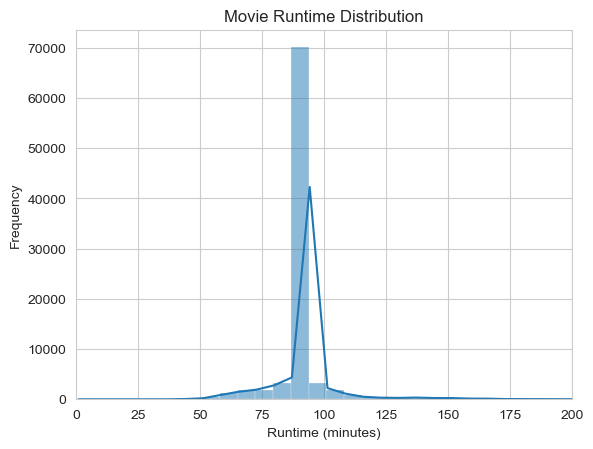

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=movies_clean, x='runtime', bins=200, kde=True)
plt.title('Movie Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.show()


There's a good distribution of the runtime 

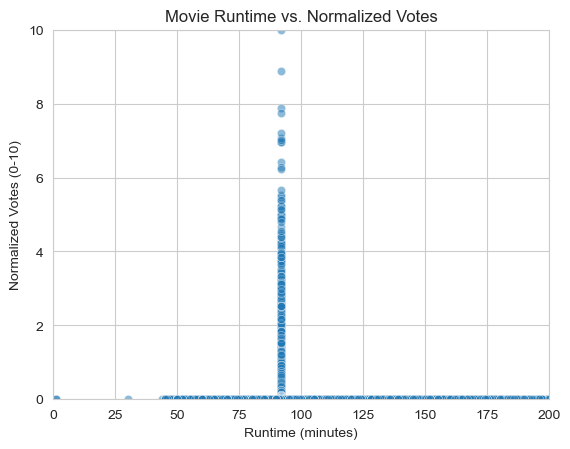

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize votes to a 0-10 scale
movies_clean['normalized_votes'] = (movies_clean['votes'] / movies_clean['votes'].max()) * 10

# Create the scatter plot
sns.scatterplot(data=movies_clean, x='runtime', y='normalized_votes', alpha=0.5)
plt.title('Movie Runtime vs. Normalized Votes')
plt.xlabel('Runtime (minutes)')
plt.xlim(0, 200)
plt.ylabel('Normalized Votes (0-10)')
plt.ylim(0, 10)
plt.show()


### Genre

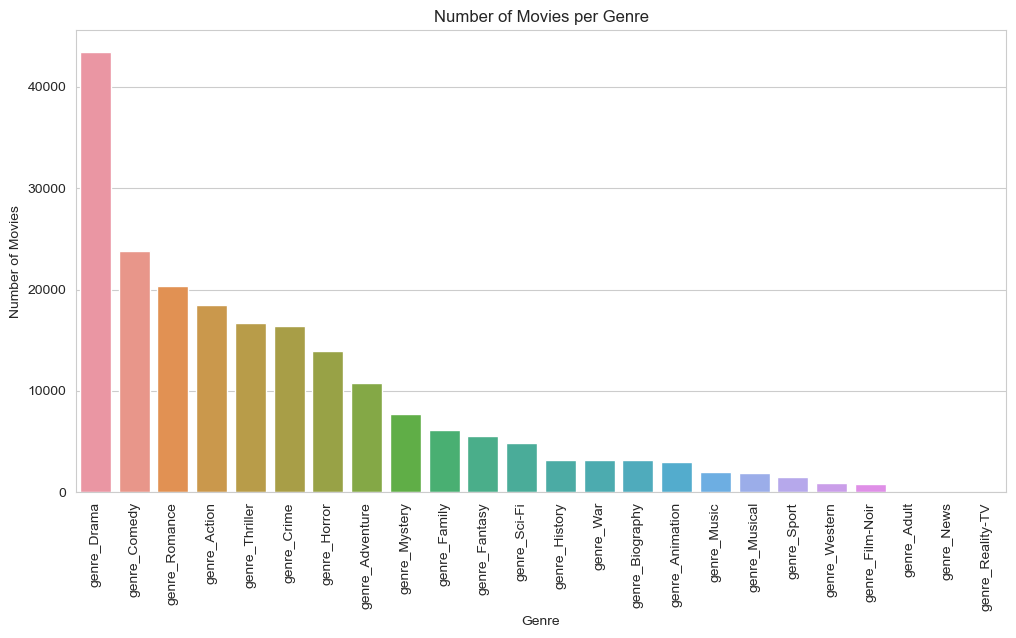

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of movies per genre
genre_movie_counts = genre_one_hot_df.sum().reset_index()
genre_movie_counts.columns = ['genre', 'movie_count']

# Sort the DataFrame by movie count
genre_movie_counts = genre_movie_counts.sort_values(by='movie_count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='movie_count', data=genre_movie_counts)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


The number of movies per genre is surprising for me I would not expect Drama to be so high. I suspect it's because 'drama' is frequently used along with another main genre. 

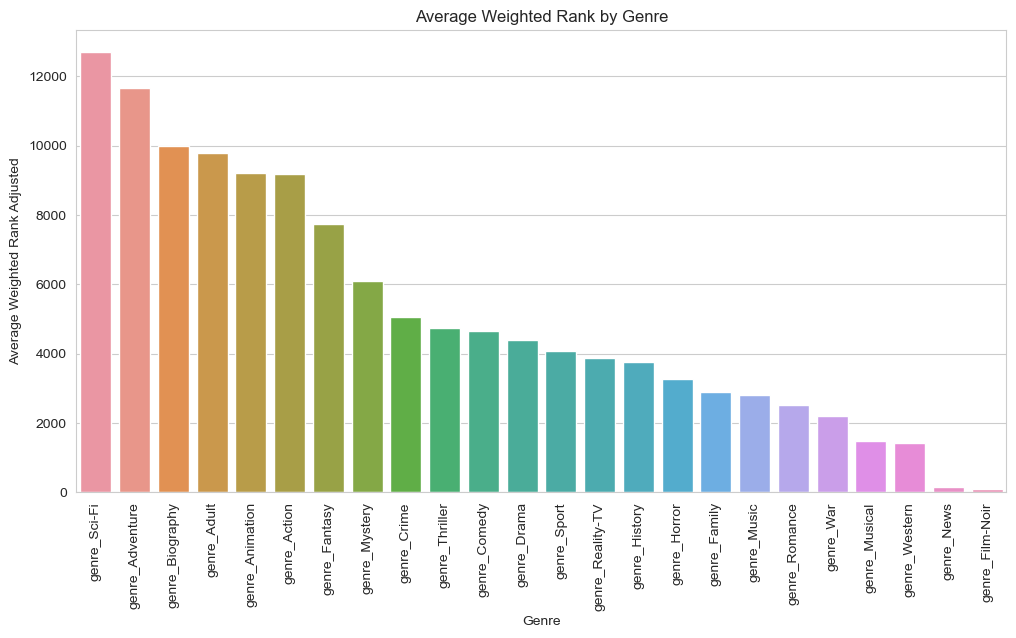

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average weighted rank per genre
genre_weighted_rank = {}
for genre in genre_labels:
    genre_weighted_rank[genre] = movies_clean_merge.loc[movies_clean_merge[genre] == 1, 'adjusted_votes'].mean()

# Convert the dictionary into a DataFrame
genre_weighted_rank_df = pd.DataFrame(list(genre_weighted_rank.items()), columns=['genre', 'avg_adjusted_votes'])

# Sort the DataFrame by average weighted rank
genre_weighted_rank_df = genre_weighted_rank_df.sort_values(by='avg_adjusted_votes', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='avg_adjusted_votes', data=genre_weighted_rank_df)
plt.title('Average Weighted Rank by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Weighted Rank Adjusted')
plt.xticks(rotation=90)
plt.show()


The results are not too surprising but it's good to get my thoughts confirmed with real data. 
I would have thought that Horror would be above Music though. Looks like Westerns are dying off too. 

In [ ]:
# Genre popularity over time: Analyze how the popularity of different genres has evolved over the years.


### Actors

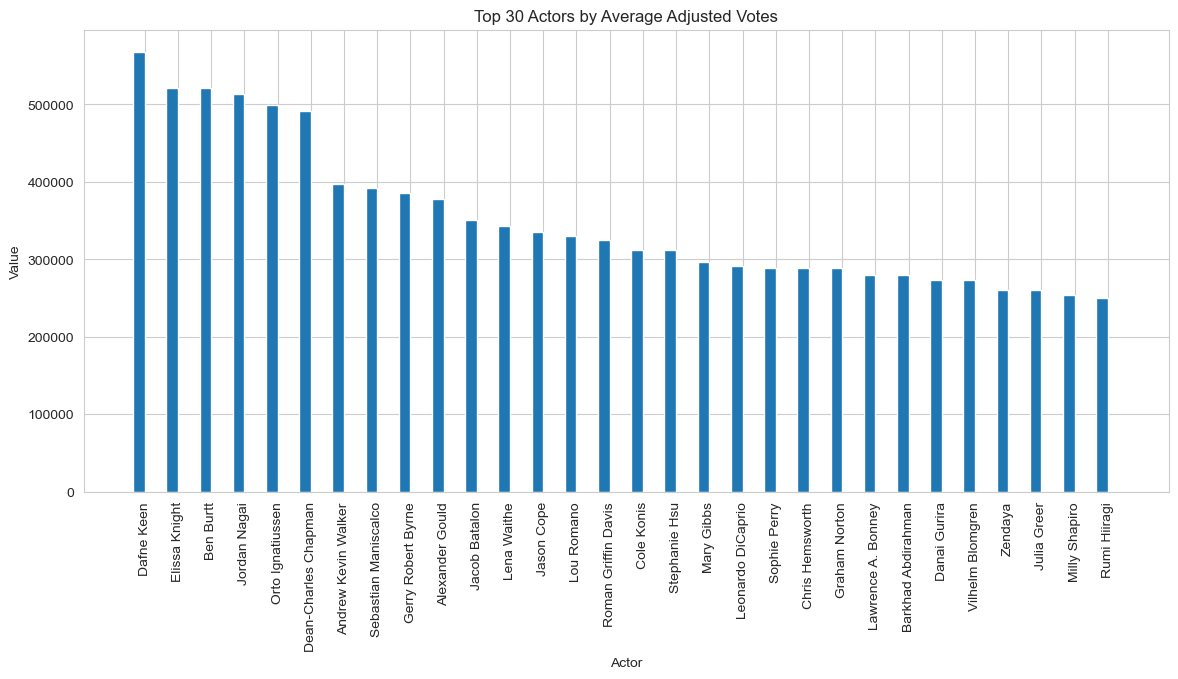

In [164]:
import numpy as np
import matplotlib.pyplot as plt

N = 30  # Number of top actors to display

movies_clean['star_list'] = movies_clean['star'].apply(lambda x: x.split(', '))

exploded_movies = movies_clean.explode('star_list')

actor_stats_all = exploded_movies.groupby('star_list').agg({
    'adjusted_votes': ['count', 'mean']
}).reset_index()

# Rename the columns
actor_stats_all.columns = ['actor', 'frequency', 'avg_weighted_rank']

# Sort the actors by their average adjusted_votes in descending order
actor_stats_sorted = actor_stats_all.sort_values('avg_weighted_rank', ascending=False)

# Select the top N actors
top_actors = actor_stats_sorted.head(N)

# Create a grouped bar chart with the average adjusted_votes and frequencies of the top N actors
bar_width = 0.35  # Set the width of the bars
index = np.arange(N)  # Create an index for the bars

plt.figure(figsize=(14, 6))
plt.bar(index, top_actors['avg_weighted_rank'], bar_width, label='Average Adjusted Votes')
plt.bar(index + bar_width, top_actors['frequency'], bar_width, label='Frequency')

plt.xlabel('Actor')
plt.xticks(index + bar_width / 2, top_actors['actor'], rotation=90)
plt.ylabel('Value')
plt.title(f'Top {N} Actors by Average Adjusted Votes')

plt.show()



This chart isn't maybe the best, as many secondary actors get the same rank as the main actor. Let's do just frequency of all actors.. and limit to the top movies (top 5000 seems to give the best results).

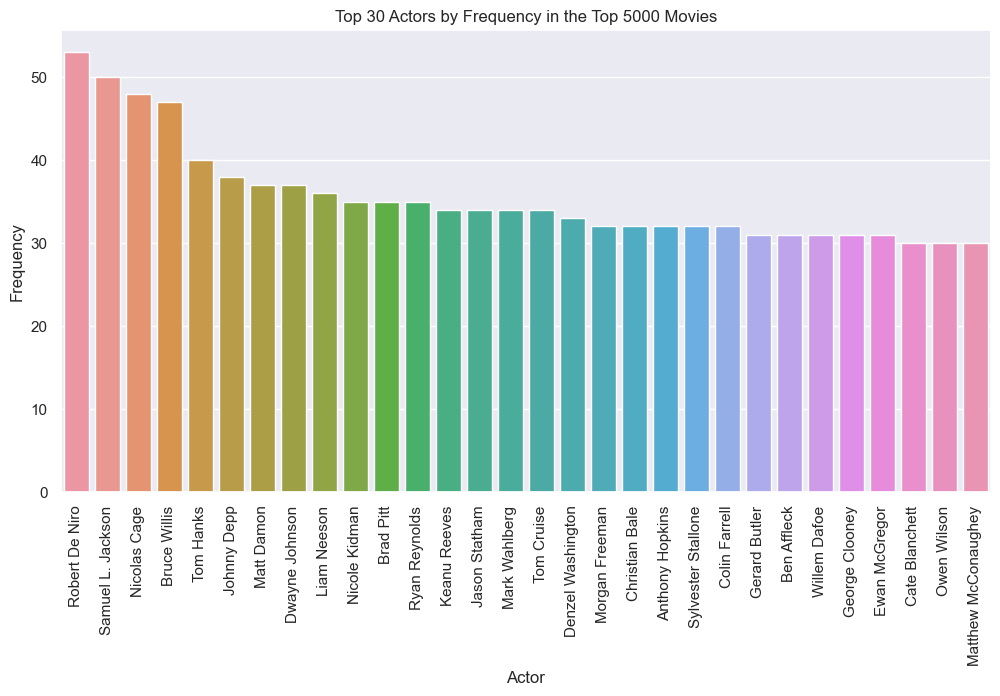

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 30  # Number of top actors to display

# Sort the movies_clean DataFrame by 'adjusted_votes' and select the top 5000 movies
top_2000_movies = movies_clean.sort_values('adjusted_votes', ascending=False).head(5000)

top_2000_movies['star_list'] = top_2000_movies['star'].apply(lambda x: x.split(', '))

exploded_movies = top_2000_movies.explode('star_list')

actor_stats_all = exploded_movies.groupby('star_list').agg({
    'adjusted_votes': ['count', 'mean']
}).reset_index()

# Rename the columns
actor_stats_all.columns = ['actor', 'frequency', 'avg_weighted_rank']

# Sort the actors by their frequency in descending order
actor_stats_sorted_frequency = actor_stats_all.sort_values('frequency', ascending=False)

# Select the top N actors
top_actors_frequency = actor_stats_sorted_frequency.head(N)

# Create a Seaborn bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='actor', y='frequency', data=top_actors_frequency)
plt.title(f'Top {N} Actors by Frequency in the Top 5000 Movies')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Now this chart makes a lot more sense! Let's add some more complexity and check what the genres are for these top actors. 

In [251]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

N = 30  # Number of top actors to display

# Merge the top 2000 movies DataFrame with the genre one-hot encoded DataFrame
top_2000_movies_genre = top_2000_movies.merge(genre_one_hot_df, left_index=True, right_index=True)

top_2000_movies_genre['star_list'] = top_2000_movies_genre['star'].apply(lambda x: x.split(', '))
exploded_movies_genre = top_2000_movies_genre.explode('star_list')

# Calculate the genre frequency for each actor
actor_genre_freq = exploded_movies_genre.groupby(['star_list'])[genre_labels].sum().reset_index()

# Merge actor frequency and actor genre frequency
actor_stats_genre_freq = actor_stats_sorted_frequency.merge(actor_genre_freq, left_on='actor', right_on='star_list')

# Select the top N actors with genre frequencies
top_actors_genre_freq = actor_stats_genre_freq.head(N)

# Prepare the stacked bar chart
fig = go.Figure()

for genre in genre_labels:
    fig.add_trace(go.Bar(
        x=top_actors_genre_freq['actor'],
        y=top_actors_genre_freq[genre],
        name=genre,
        text=top_actors_genre_freq[genre],
        textposition='auto'
    ))

fig.update_layout(
    title=f'Top {N} Actors by Frequency in the Top 5000 Movies (Stacked by Genre)',
    xaxis=dict(title='Actor', tickangle=45),
    yaxis=dict(title='Frequency'),
    barmode='stack',
    legend=dict(title='Genres'), 
    height=800
)

fig.show()


![](https://raw.githubusercontent.com/ralphmartynward/ironhack_05_mid-bootcamp-project/main/img/top_actors_top_5000.png)

The chart is a little messy, but it still showcases the actors diversity in their roles. Dwane Johnson, Bruce  Willis and Jason statham have a high number of action adventure, no surprises there! 

### Hypothesis testing

Let's dive even deeper and do a statistical analysis to see if there's any correlation between well known actors and the movie performance. To do this, let's get another dataset that shows the Oscars winners https://www.kaggle.com/datasets/unanimad/the-oscar-award (1927-2023) and golden globe winners: https://www.kaggle.com/datasets/unanimad/golden-globe-awards (1944-2020)

In [198]:
# load the oscar data 
oscar_data = pd.read_csv('./data/raw/the_oscar_award.csv')
# filter only for winner = true 
oscar_data = oscar_data[oscar_data['winner'] == True]
# filter all categories that have either "actor" or "actress" in the name 
oscar_data = oscar_data[oscar_data['category'].str.contains('ACTOR|ACTRESS', regex=True)]
# rename name to star and year_ceremony to year_award
oscar_data = oscar_data.rename(columns={'name': 'star', 'year_ceremony': 'year_award'})
oscar_data.head()

year_film  year_award  ceremony category           star              film  \
1        1927        1928         1    ACTOR  Emil Jannings  The Last Command   
3        1927        1928         1  ACTRESS   Janet Gaynor        7th Heaven   
36       1928        1929         2    ACTOR  Warner Baxter    In Old Arizona   
45       1928        1929         2  ACTRESS  Mary Pickford          Coquette   
73       1929        1930         3    ACTOR  George Arliss          Disraeli   

    winner  
1     True  
3     True  
36    True  
45    True  
73    True

In [196]:
# load the golden globe data
golden_globe_data = pd.read_csv('./data/raw/golden_globe_awards.csv')
# filter only for win = true
golden_globe_data = golden_globe_data[golden_globe_data['win'] == True]
# filter all categories that have either "Actor" or "Actress" in the name
golden_globe_data = golden_globe_data[golden_globe_data['category'].str.contains('Actor|Actress', regex=True)]
# rename win to winner, and nominee to star
golden_globe_data = golden_globe_data.rename(columns={'win': 'winner', 'nominee': 'star'})
golden_globe_data.head()

year_film  year_award  ceremony  \
0       1943        1944         1   
1       1943        1944         1   
4       1943        1944         1   
5       1943        1944         1   
6       1944        1945         2   

                                            category             star  \
0  Best Performance by an Actress in a Supporting...   Katina Paxinou   
1  Best Performance by an Actor in a Supporting R...    Akim Tamiroff   
4                          Actress In A Leading Role   Jennifer Jones   
5                            Actor In A Leading Role       Paul Lukas   
6  Best Performance by an Actress in a Supporting...  Agnes Moorehead   

                      film  winner  
0  For Whom The Bell Tolls    True  
1  For Whom The Bell Tolls    True  
4   The Song Of Bernadette    True  
5       Watch On The Rhine    True  
6          Mrs. Parkington    True

In [199]:
# let's merge the two dataframes
awards_data = pd.concat([oscar_data, golden_globe_data])
awards_data.shape

(1356, 7)

Now for the subtle addition, we want to check if the movie has in its cast an actor/actress that received an Oscar or a Golden Globe BEFORE the movie was released!

In [207]:
# Step 1: Create a dictionary to store years when actors won awards
actor_award_years = {}

# Step 2: Iterate through the 'awards_data' DataFrame and store the years
for _, row in awards_data.iterrows():
    actor = row['star']
    year_award = row['year_award']
    if actor not in actor_award_years or year_award < actor_award_years[actor]:
        actor_award_years[actor] = year_award

# Step 3: Define a function to check if a movie has an award-winning actor
def has_award_winning_actor(row, actor_award_years):
    movie_year = row['year']
    star_list = row['star_list']
    for actor in star_list:
        if actor in actor_award_years and actor_award_years[actor] < movie_year:
            return 1
    return 0

# Step 4: Create a new column 'award' based on the output of the function
actor_award = movies_clean
actor_award['award'] = actor_award.apply(lambda row: has_award_winning_actor(row, actor_award_years), axis=1)
# show head and all rows
pd.set_option('display.max_rows', None)
actor_award.head()

movie_name  year                      genre  \
0        The Dark Knight  2008       Action, Crime, Drama   
1              Inception  2010  Action, Adventure, Sci-Fi   
2           Interstellar  2014   Adventure, Drama, Sci-Fi   
3                  Joker  2019     Crime, Drama, Thriller   
4  The Dark Knight Rises  2012              Action, Drama   

                                         description  rating      votes  \
0  When the menace known as the Joker wreaks havo...     9.0  2675531.0   
1  A thief who steals corporate secrets through t...     8.8  2373682.0   
2  A team of explorers travel through a wormhole ...     8.6  1859256.0   
3  A mentally troubled stand-up comedian embarks ...     8.4  1310698.0   
4  Eight years after the Joker's reign of chaos, ...     8.4  1717874.0   

            director                                               star  \
0  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
2  Christopher Nolan  Matthew McConaughey, Anne Hathaway, Jessica Ch...   
3      Todd Phillips  Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...   
4  Christopher Nolan  Christian Bale, Tom Hardy, Anne Hathaway, Gary...   

   runtime  watched  weighted_rank  adjusted_votes  \
0      NaN        1       8.992423       1239550.0   
1      NaN        1       8.792784       1218511.0   
2      NaN        1       8.593008       1171795.0   
3      NaN        1       8.392888       1067572.0   
4      NaN        1       8.392231        977127.0   

                    genre_list  \
0       [Action, Crime, Drama]   
1  [Action, Adventure, Sci-Fi]   
2   [Adventure, Drama, Sci-Fi]   
3     [Crime, Drama, Thriller]   
4              [Action, Drama]   

                                           star_list        director_list  \
0  [Christian Bale, Heath Ledger, Aaron Eckhart, ...  [Christopher Nolan]   
1  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...  [Christopher Nolan]   
2  [Matthew McConaughey, Anne Hathaway, Jessica C...  [Christopher Nolan]   
3  [Joaquin Phoenix, Robert De Niro, Zazie Beetz,...      [Todd Phillips]   
4  [Christian Bale, Tom Hardy, Anne Hathaway, Gar...  [Christopher Nolan]   

   decade  award  
0    2000      1  
1    2010      1  
2    2010      1  
3    2010      1  
4    2010      1

Now for the hypothesis testing. I believe there will be a signficant difference between the ratings of movies with Oscar/Golden Globe winners and movies without.

In [211]:
# Splitting the data into two groups
award_winning_movies = actor_award[actor_award['award'] == 1]
non_award_winning_movies = actor_award[actor_award['award'] == 0]

# Calculate the means
mean_popularity_award = award_winning_movies['adjusted_votes'].mean()
mean_popularity_non_award = non_award_winning_movies['adjusted_votes'].mean()

print(f"Mean popularity with award-winning actors: {mean_popularity_award}")
print(f"Mean popularity without award-winning actors: {mean_popularity_non_award}")

import scipy.stats as stats
# Perform the t-test
t_stat, p_value = stats.ttest_ind(award_winning_movies['adjusted_votes'],
                                   non_award_winning_movies['adjusted_votes'],
                                   equal_var=False)

print(f"T-statistic: {t_stat}") # t-stat is usually for a sample of 30 but as we have a big dataset, the distribution gets closer to normal (z) so it's ok to use
print(f"P-value: {p_value}")

# Confidence interval
confidence_level = 0.95
degrees_freedom = len(award_winning_movies) + len(non_award_winning_movies) - 2
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

standard_error_award = np.std(award_winning_movies['adjusted_votes'], ddof=1) / np.sqrt(len(award_winning_movies))
standard_error_non_award = np.std(non_award_winning_movies['adjusted_votes'], ddof=1) / np.sqrt(len(non_award_winning_movies))
combined_standard_error = np.sqrt(standard_error_award ** 2 + standard_error_non_award ** 2)

margin_of_error = critical_value * combined_standard_error
confidence_interval = (mean_popularity_award - mean_popularity_non_award) + np.array([-1, 1]) * margin_of_error

print(f"Confidence interval: {confidence_interval}")


Mean popularity with award-winning actors: 23926.83440804746
Mean popularity without award-winning actors: 2742.740756615024
T-statistic: 25.202811801975198
P-value: 7.74855131380165e-135
Confidence interval: [19536.63312008 22831.55418278]


Mean popularity with award winning actors is a lot higher; the t-test shows that the difference is significant. 
p-value is much lower than the significance level of 0.05, so the evidence is very strong. 

The results clearly show that we can reject the null hypothesis, there's indeed a significant difference in the popularity of movies with award-winning actors and those without. 

### Directors

In [281]:
# What are the directors that have the highest average weighted rank?
import numpy as np
import matplotlib.pyplot as plt

N = 100  # Number of top directors to display

movies_clean['director_list'] = movies_clean['director'].apply(lambda x: x.split(', '))

exploded_moviess = movies_clean.explode('director_list')

director_stats_all = exploded_moviess.groupby('director_list').agg({
    'votes': ['count', 'mean']
}).reset_index()

# Rename the columns
director_stats_all.columns = ['director', 'frequency', 'votes']

# Sort the actors by their average adjusted_votes in descending order
director_stats_sorted = director_stats_all.sort_values('votes', ascending=False)

# Select the top N actors
top_directors = director_stats_sorted.head(N)
# Remove rows with 'avg_weighted_rank' equal to zero
top_directors = top_directors[top_directors['votes'] != 0]
top_directors = top_directors[top_directors['frequency'] >= 4]

# Now create the treemap
import plotly.express as px

fig = px.treemap(
    top_directors,
    path=['director'],
    values='votes',
    color='frequency',
    color_continuous_scale='Greens',
    title=f"Top Directors by average top rankings",
    width=1500,
    height=800,
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Frequency",
    )
)

fig.show()


![](https://raw.githubusercontent.com/ralphmartynward/ironhack_05_mid-bootcamp-project/main/img/treemap_directors.png)

Without surprises, Chirstopher Nolan is the most prolific director. I'm not that well versed with directors so there are quite a few that I don't know. I certainly wouldn't think that Ben Affeck would be on this list

### Top Movies 

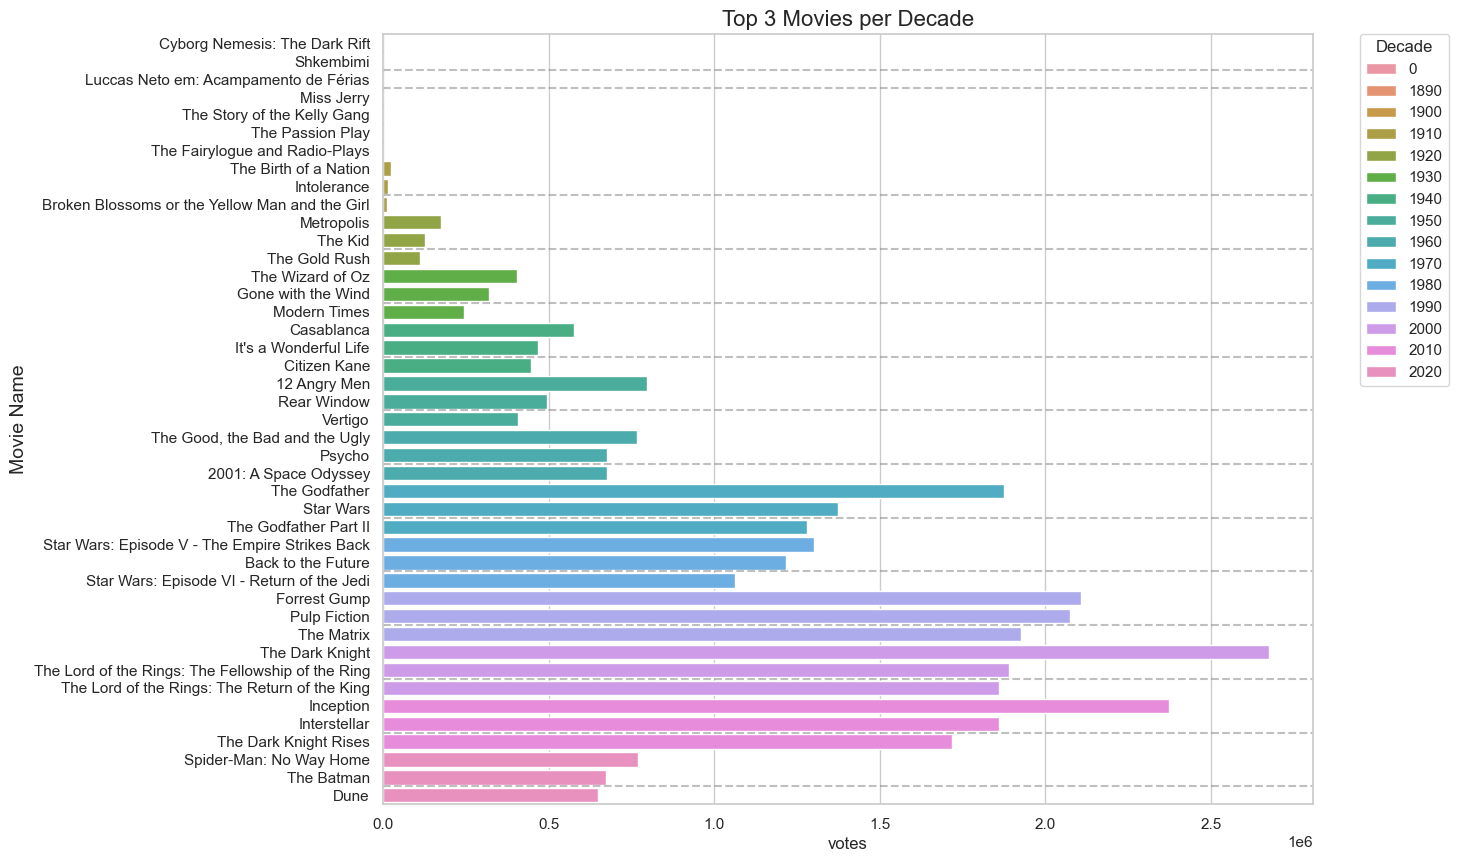

In [283]:
# show the top 10 ranking (weighted_rank) movies (movie_name) 
# Function to categorize movies by decade

# Assuming your DataFrame is called 'movies'
movies_clean['decade'] = (movies_clean['year'] // 10) * 10

# Get the top 10 movies per decade
top_movies = movies_clean.groupby('decade').apply(lambda x: x.nlargest(3, 'votes')).reset_index(drop=True)

# Select only the required columns for the output DataFrame
result_df = top_movies[['decade', 'movie_name', 'votes']]

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result_df' is the DataFrame containing the top 3 movies per decade
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Plot the horizontal bar chart
chart = sns.barplot(x='votes', y='movie_name', hue='decade', data=result_df, dodge=False)

# Set labels and title
chart.set_ylabel('Movie Name', fontsize=14)
chart.set_title('Top 3 Movies per Decade', fontsize=16)

# Place the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Decade")

# Add vertical lines between each decade
unique_decades = result_df['decade'].unique()
for i, decade in enumerate(unique_decades[:-1]):
    current_decade_count = len(result_df[result_df['decade'] == decade])
    next_decade_start = (i + 1) * current_decade_count - 0.5
    plt.axhline(y=next_decade_start, color='gray', linestyle='--', alpha=0.5)


# Show the plot
plt.show()


Maybe this comparison is a little unfair, as the votes are lower for the older movies 

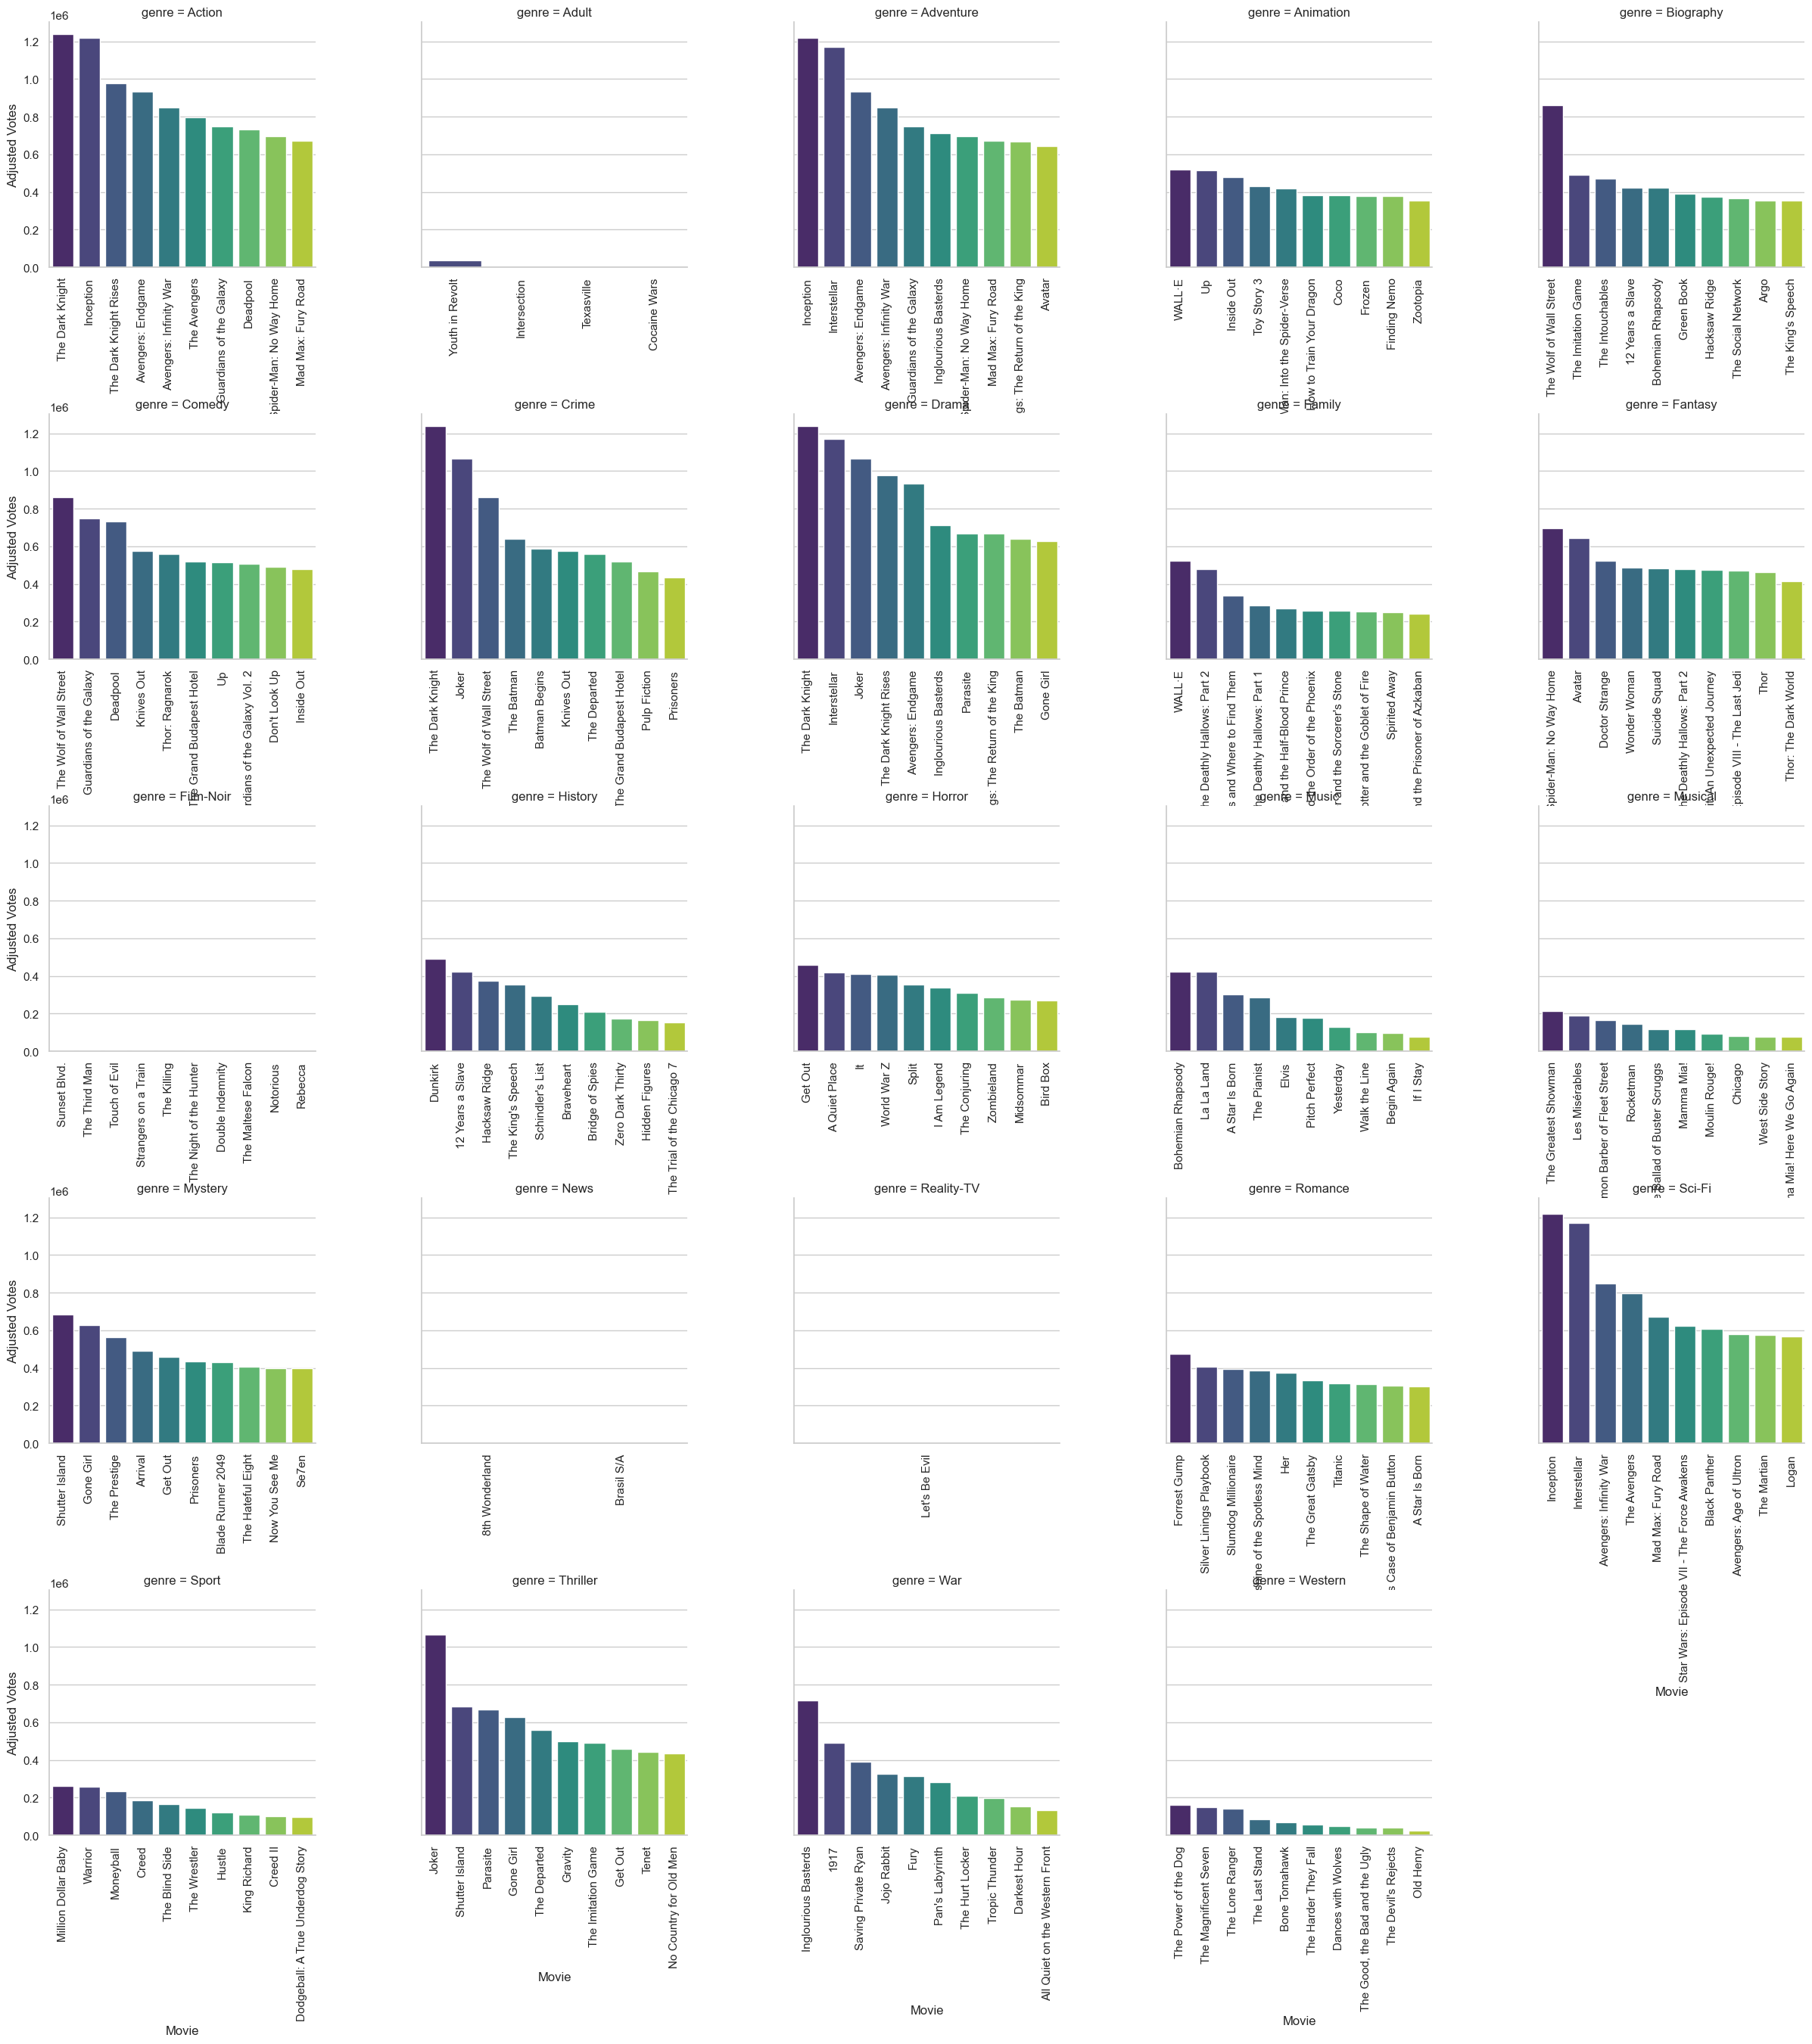

In [284]:
# The most popular movies ('adjusted_votes') in each genre from the 'movies_clean_merge' DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the movies_clean DataFrame with genre_one_hot_df
movies_clean_merge = pd.merge(movies_clean, genre_one_hot_df, left_index=True, right_index=True)

# Extract the genres from genre_one_hot_df
genres = [col.split("_", 1)[1] for col in genre_one_hot_df.columns]

# Initialize an empty list to store the top 5 movies in each genre
top_movies_by_genre_list = []

# Find the top 5 movies with the highest 'adjusted_votes' in each genre
for genre in genres:
    genre_movies = movies_clean_merge.loc[movies_clean_merge[f"genre_{genre}"] == 1]
    top_5_movies = genre_movies.nlargest(10, "adjusted_votes")
    top_5_movies["genre"] = genre
    top_movies_by_genre_list.append(top_5_movies)

# Concatenate the list of DataFrames into a single DataFrame
top_movies_by_genre = pd.concat(top_movies_by_genre_list)

# Remove the index name
top_movies_by_genre.reset_index(drop=True, inplace=True)

# Create a FacetGrid to display a series of bar charts for each genre
g = sns.FacetGrid(top_movies_by_genre, col="genre", col_wrap=5, sharex=False, height=5, aspect=1)
g.map(sns.barplot, "movie_name", "adjusted_votes", order=None, palette='viridis')

# Customize the plot appearance
g.set_xticklabels(rotation=90)
g.set_axis_labels("Movie", "Adjusted Votes")

# Adjust space between subplots
g.fig.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()


There are some repetitions of movies here, as a movie can have more than one genre, but the results are still interesting

## Custom  overview: My watched movies

### Top Actors
Let's check the most frequent actors in my watched movies, we'll use a wordcloud to visualize this

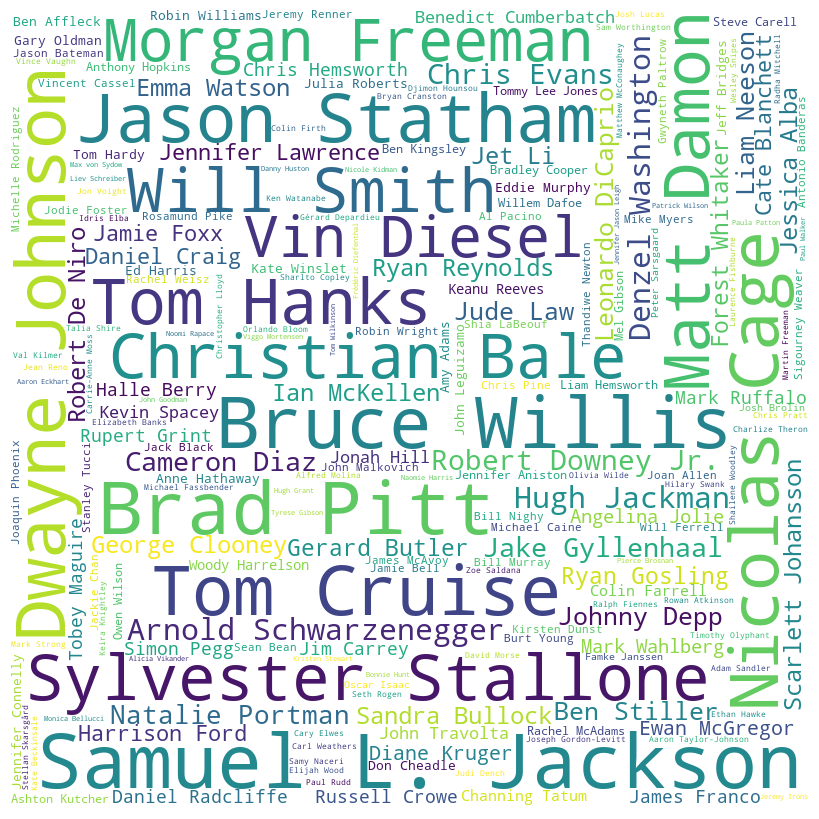

In [176]:
# Filter movies_clean DataFrame to only include watched movies
watched_movies = movies_clean[movies_clean['watched'] == 1]

# Calculate frequencies of actors in watched movies
actor_frequencies_watched = watched_movies['star_list'].explode().value_counts()

# Get the top N most frequent actors and their frequencies in watched movies
top_actor_frequencies_watched = actor_frequencies_watched.head(N)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the top_actor_frequencies_watched series to a dictionary
actor_freq_dict_watched = top_actor_frequencies_watched.to_dict()

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white')

# Generate the word cloud using the actor frequencies
wordcloud.generate_from_frequencies(actor_freq_dict_watched)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

A lot of guys as main actors! I though I was more diversified than that! 

### Rating Distribution

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



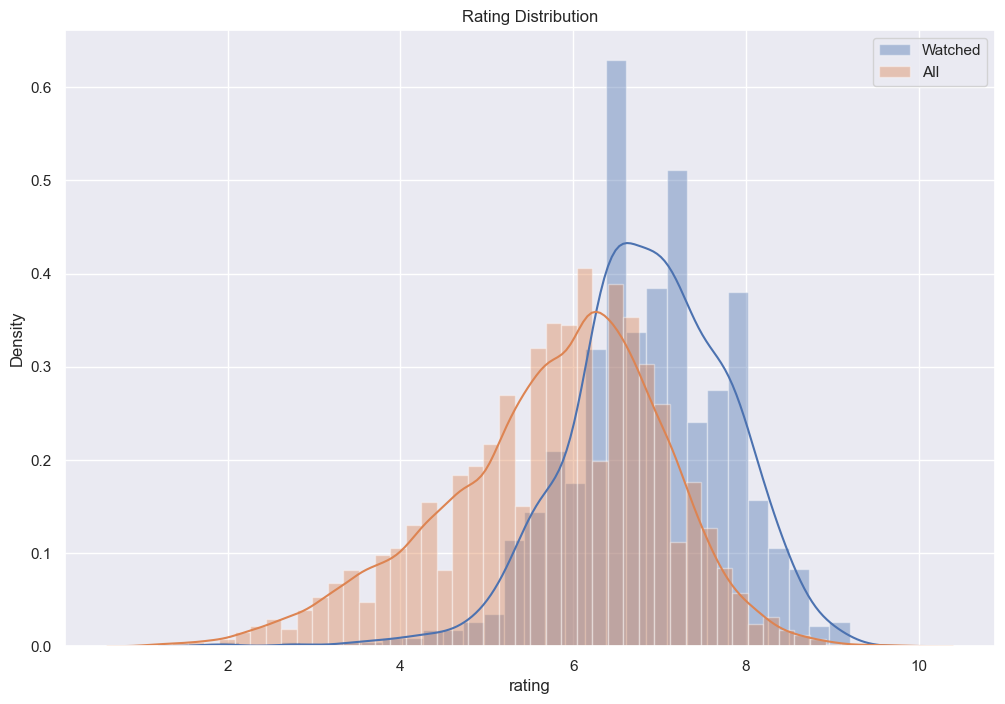

In [286]:
# in watched dataframe, plot rating & add in same plot the rating of all movies

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.distplot(watched_movies['rating'], label='Watched')
sns.distplot(movies_clean['rating'], label='All')
plt.legend()
plt.title('Rating Distribution')
plt.show();

Looks like I've got better taste than the average! Yay me!

### Movies and genres watched over time

In [327]:
import pandas as pd
import plotly.express as px

merged_df['created'] = pd.to_datetime(merged_df['created'])
merged_df = merged_df[merged_df['created'] >= '2015-10-01']
exploded_movies = merged_df.explode('genre_list')
monthly_genre_count = exploded_movies.groupby([pd.Grouper(key='created', freq='M'), 'genre_list']).size().reset_index(name='count')
quarterly_genre_count = exploded_movies.groupby([pd.Grouper(key='created', freq='Q'), 'genre_list']).size().reset_index(name='count')

stacked_data = quarterly_genre_count.pivot_table(index='created', columns='genre_list', values='count', fill_value=0).reset_index()

fig = go.Figure()

for genre in stacked_data.columns[1:]:
    fig.add_trace(go.Bar(x=stacked_data['created'], y=stacked_data[genre], name=genre))

fig.update_layout(
    title='Number of Movies per Genre per Quarter (since October 2015)',
    xaxis=dict(title='Quarter'),
    yaxis=dict(title='Number of Movies'),
    barmode='stack',
    legend=dict(title='Genres'), 
    height=1000,
)

# Show the plot
fig.show()


![](https://raw.githubusercontent.com/ralphmartynward/ironhack_05_mid-bootcamp-project/main/img/my_movies_genre_over_time.png)

The "created date" in Pinterest very roughly matches when I actually watched the movies. However, I was not consistent in pinning on the board, so looking at this data turns out to be not that insightful.

## Recommendation System 

Now to the more complex part of the recommendation system. The real beast

There's basically 3 types of recommendation systems: collaborative filtering, content based filtering and hybrid.
- User-User Collaborative Filtering: Try to search for lookalike customers and offer products based on what his/her lookalike has chosen.
- Item-Item Collaborative Filtering: It is very similar to the previous algorithm, but instead of finding a customer lookalike, we try finding item lookalike. Once we have an item lookalike matrix, we can easily recommend alike items to a customer who has purchased an item from the store.
- Other algorithms: There are other approaches like market basket analysis, which works by looking for combinations of items that occur together frequently in transactions.

https://towardsdatascience.com/recommendation-systems-explained-a42fc60591ed

Since I don't have any other user data, I'll only check the content based filtering. 

To implement this, I'll be using an NLP approach of cosine similarity. 

https://www.youtube.com/watch?v=e9U0QAFbfLI

https://towardsdatascience.com/what-is-cosine-similarity-how-to-compare-text-and-images-in-python-d2bb6e411ef0 

![](https://miro.medium.com/v2/resize:fit:432/0*uykF33BUhA2h9OM8.png)


To do this effectively, I'll be working with the description column as it contains the most text. However, machines can't work with text, so we'll need to convert it to numbers. 

One approach is by tokenisation (dividing the text into words) and then vectorisation (converting the words into numbers). This process allows NLP to work with text. 

https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4

In [ ]:
SKlearn models: Kmeans (simple one) / dbscan / gaussian mixture

## Preliminary tests with easy vectorisers

In [93]:
# TF-IDF Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies['description'] = movies['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies['description'])
tfidf_matrix.shape

(134619, 89634)

Huge dataframe, but let's use cosine similarity matrix to understand the description column and identify similar patterns and structure from it. 
So we first calculate the cosine similarity matrix by importing linear kernel.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Big fail, the data was way too big. Let's try with the count vectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['description'])
df_cv = pd.DataFrame(count_matrix.toarray(), index=movies('title'), columns=count.get_feature_names())
df_cv.head()

This also doesn't work, the problem seems to be because we're dealing with tabular data. We may need to introduce embedding. 

https://saschametzger.com/blog/a-beginners-guide-to-tokens-vectors-and-embeddings-in-nlp/ 

Luckily, in the morning I read in the news about this company that raised money that seemed to do exaclty what I needed: Qdrant

## Advanced testing with Qdrant 

In [77]:
from qdrant_client import QdrantClient

client = QdrantClient(host="localhost", port=6333)

collections = client.get_collections()
print(collections)


collections=[]


In [74]:
from qdrant_client import models, QdrantClient
from sentence_transformers import SentenceTransformer
encoder = SentenceTransformer('all-MiniLM-L6-v2') # Model to create embeddings


In [75]:
top_movies = movies_clean.nlargest(5000, "adjusted_votes")


In [ ]:
# Create a Qdrant collection to store watched movies
qdrant.recreate_collection(
    collection_name="watched_movies",
    vectors_config=models.VectorParams(
        size=encoder.get_sentence_embedding_dimension(),
        distance=models.Distance.COSINE,
        vector_size=encoder.get_sentence_embedding_dimension()
    )
)

# Create a Qdrant collection to store unwatched movies
qdrant.recreate_collection(
    collection_name="unwatched_movies",
    vectors_config=models.VectorParams(
        size=encoder.get_sentence_embedding_dimension(),
        distance=models.Distance.COSINE,
        vector_size=encoder.get_sentence_embedding_dimension()
    )
)


In [ ]:
watched_movies = top_movies[top_movies['watched'] == 1]
unwatched_movies = top_movies[top_movies['watched'] == 0]

watched_records = [
    models.Record(
        id=int(index),
        vector=encoder.encode(row["description"]).tolist(),
        payload=row.to_dict()
    ) for index, row in watched_movies.iterrows()
]

unwatched_records = [
    models.Record(
        id=int(index),
        vector=encoder.encode(row["description"]).tolist(),
        payload=row.to_dict()
    ) for index, row in unwatched_movies.iterrows()
]

qdrant.upload_records(collection_name="watched_movies", records=watched_records)
qdrant.upload_records(collection_name="unwatched_movies", records=unwatched_records)


I'm not going to lie, working with Qdrant was a lot harder than expected, I tried to get it working in Google colab, using Docker, but there was just too much data to handle. In the end I gave up and went with a simpler appraoch, while only focusing on the top movies for the recommendation system.

## Mid complexity approach

In [98]:
# Top 10,000 movies sorted by adjusted votes and split into watched and unwatched
movies_clean_sorted = movies_clean.sort_values('adjusted_votes', ascending=False)
top_5000_movies = movies_clean_sorted.head(10000)
watched_movies = top_5000_movies[top_5000_movies['watched'] == 1]
unwatched_movies = top_5000_movies[top_5000_movies['watched'] == 0]


### Tokenisation & Vectorisation (Embeddings)

The Sentence Transformer was used here as it's apparently more efficient for creating the embeddings that we need. It's also faster. 

In [100]:
from sentence_transformers import SentenceTransformer

encoder = SentenceTransformer('all-MiniLM-L6-v2')

watched_movies_descriptions = watched_movies['description'].tolist()
unwatched_movies_descriptions = unwatched_movies['description'].tolist()


### Stop words

First we'll need to clean the text by removing punctuation and stopwords (common words that don't add much value to the analysis). 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = ' '.join([w for w in word_tokens if w.lower() not in stop_words])
    return filtered_text

watched_movies_descriptions_no_stop = [remove_stop_words(desc) for desc in watched_movies_descriptions]
unwatched_movies_descriptions_no_stop = [remove_stop_words(desc) for desc in unwatched_movies_descriptions]

watched_movies_embeddings = encoder.encode(watched_movies_descriptions_no_stop)
unwatched_movies_embeddings = encoder.encode(unwatched_movies_descriptions_no_stop)


### Cosine similarity

In [105]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(watched_movies_embeddings, unwatched_movies_embeddings)
mean_similarity = np.mean(similarity_matrix, axis=0)
top_10_indices = mean_similarity.argsort()[-10:][::-1]

top_10_similar_unwatched_movies = unwatched_movies.iloc[top_10_indices]


The cosine similarity from sklearn was surprisingly fast for this task. Let's check the first 10 scores 

In [106]:
top_10_similar_unwatched_movies

movie_name  year                     genre  \
9443            Sparks  2013  Action, Sci-Fi, Thriller   
6270      Suspect Zero  2004    Crime, Horror, Mystery   
1993         Blue Ruin  2013    Crime, Drama, Thriller   
5256  New Police Story  2004   Action, Crime, Thriller   
3441    Redemption Day  2021   Action, Drama, Thriller   
4528               Kin  2018     Action, Drama, Sci-Fi   
8046   Out for Justice  1991      Action, Crime, Drama   
4576       The Villain  2014      Action, Crime, Drama   
8702      Diamond Dust  2018     Crime, Drama, Mystery   
8822             Pixie  2020   Comedy, Crime, Thriller   

                                            description  rating    votes  \
9443  A masked vigilante who discovers the dark side...     4.8   5853.0   
6270  A mysterious serial killer is hunting other se...     5.8  19993.0   
1993  A mysterious outsider's quiet life is turned u...     7.1  75161.0   
5256  A hero cop accidentally leads his team into a ...     6.9  27696.0   
3441  When the love of his life is kidnapped and hel...     4.5  23860.0   
4528  Chased by a vengeful criminal, the feds and a ...     5.8  17594.0   
8046  The gruesome murder of a Brooklyn Detective wi...     6.1  24532.0   
4576  When his wife becomes the latest victim of a s...     6.5  21204.0   
8702  A man who works in a pharmacy as a part time j...     7.9   5295.0   
8822  To avenge her mother's death, Pixie mastermind...     5.9   4664.0   

                              director  \
9443  Todd Burrows, Christopher Folino   
6270                  E. Elias Merhige   
1993                   Jeremy Saulnier   
5256                        Benny Chan   
3441                      Hicham Hajji   
4528        Jonathan Baker, Josh Baker   
8046                        John Flynn   
4576                        Mohit Suri   
8702                      Marwan Hamed   
8822                  Barnaby Thompson   

                                                   star runtime  watched  \
9443  Chase Williamson, Ashley Bell, Clancy Brown, J...      90        0   
6270  Aaron Eckhart, Ben Kingsley, Carrie-Anne Moss,...      99        0   
1993  Macon Blair, Devin Ratray, Amy Hargreaves, Kev...      90        0   
5256  Jackie Chan, Nicholas Tse, Charlie Yeung, Dani...     123        0   
3441  Gary Dourdan, Serinda Swan, Andy Garcia, Brice...      99        0   
4528  Myles Truitt, Jack Reynor, Dennis Quaid, Zoë K...     102        0   
8046  Steven Seagal, William Forsythe, Jerry Orbach,...      91        0   
4576  Sidharth Malhotra, Shraddha Kapoor, Riteish De...     129        0   
8702  Rosaline Elbay, Maged El-Kidwani, Tara Emad, B...     162        0   
8822  Olivia Cooke, Fra Fee, Rory Fleck Byrne, Pat S...      93        0   

      weighted_rank  adjusted_votes                  genre_list  \
9443       5.289756          3504.0  [Action, Sci-Fi, Thriller]   
6270       5.817599          7544.0    [Crime, Horror, Mystery]   
1993       7.022619         45002.0    [Crime, Drama, Thriller]   
5256       6.668464         10451.0   [Action, Crime, Thriller]   
3441       4.666529         21534.0   [Action, Drama, Thriller]   
4528       5.811170         13614.0     [Action, Drama, Sci-Fi]   
8046       6.007841          4752.0      [Action, Crime, Drama]   
4576       6.383008         13364.0      [Action, Crime, Drama]   
8702       7.038469          4097.0     [Crime, Drama, Mystery]   
8822       5.883650          3999.0   [Comedy, Crime, Thriller]   

                                              star_list  \
9443  [Chase Williamson, Ashley Bell, Clancy Brown, ...   
6270  [Aaron Eckhart, Ben Kingsley, Carrie-Anne Moss...   
1993  [Macon Blair, Devin Ratray, Amy Hargreaves, Ke...   
5256  [Jackie Chan, Nicholas Tse, Charlie Yeung, Dan...   
3441  [Gary Dourdan, Serinda Swan, Andy Garcia, Bric...   
4528  [Myles Truitt, Jack Reynor, Dennis Quaid, Zoë ...   
8046  [Steven Seagal, William Forsythe, Jerry Orbach...   
4576  [Sidharth Malhotra, 

In [103]:
# Get the top 10 indices
top_10_indices = mean_similarity.argsort()[-10:][::-1]

# Get the corresponding similarity scores
top_10_scores = mean_similarity[top_10_indices]

# Print the top 10 similar movies and their similarity scores
print("Top 10 similar movies and their similarity scores:")
for index, score in zip(top_10_indices, top_10_scores):
    movie = unwatched_movies.iloc[index]
    print(f"Movie: {movie['movie_name']}, Score: {score}")


Top 10 similar movies and their similarity scores:
Movie: Diamond Dust, Score: 0.25410196185112
Movie: New Police Story, Score: 0.2538580596446991
Movie: Doctor, Score: 0.24891439080238342
Movie: The Prince, Score: 0.24854515492916107
Movie: Sparks, Score: 0.24293583631515503
Movie: New Jack City, Score: 0.2420247495174408
Movie: Blue Ruin, Score: 0.24181276559829712
Movie: Cypher, Score: 0.2353043556213379
Movie: Aravindha Sametha, Score: 0.23354782164096832
Movie: Let's Go to Prison, Score: 0.23339127004146576


The results are weird, and the scores are rather low. Let's check this in a scatterplot to visulise the similarity clusters it found. To do this, I needed to use PCA which reduces the dimensionality 

### PCA

In [107]:
import numpy as np

all_embeddings = np.vstack((watched_movies_embeddings, unwatched_movies_embeddings))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)


In [110]:
watched_movie_ids = set(watched_movies.index)
df_plot['watched'] = all_movies.index.map(lambda x: 'Watched' if x in watched_movie_ids else 'Unwatched')


### Scatterplot

In [112]:
import plotly.graph_objs as go

fig = go.Figure()

# Add a scatter plot for watched movies
fig.add_trace(go.Scatter(
    x=df_plot[df_plot['watched'] == 'Watched']['x'],
    y=df_plot[df_plot['watched'] == 'Watched']['y'],
    mode='markers',
    marker=dict(color='blue'),
    text=df_plot[df_plot['watched'] == 'Watched']['movie_name'],
    hovertext=df_plot[df_plot['watched'] == 'Watched']['movie_name'],
    name='Watched'
))

# Add a scatter plot for unwatched movies
fig.add_trace(go.Scatter(
    x=df_plot[df_plot['watched'] == 'Unwatched']['x'],
    y=df_plot[df_plot['watched'] == 'Unwatched']['y'],
    mode='markers',
    marker=dict(color='orange'),
    text=df_plot[df_plot['watched'] == 'Unwatched']['movie_name'],
    hovertext=df_plot[df_plot['watched'] == 'Unwatched']['movie_name'],
    name='Unwatched'
))

# Update the layout
fig.update_layout(
    title='Movie Embeddings in 2D Space',
    height=1500  # Adjust the plot height here
)

fig.show()


![](https://raw.githubusercontent.com/ralphmartynward/ironhack_05_mid-bootcamp-project/main/img/scatterplot_2D.png)

The data looks odd I don't seem to recognise clear patterns in the clusters. Even though PCA isn't perfect and the distances shown are to be considered as an approximation. I wonder what this would look like in 3D instead

In [294]:
import plotly.graph_objs as go

# First, combine watched and unwatched movie embeddings into a single array
all_movie_embeddings = np.concatenate([watched_movies_embeddings, unwatched_movies_embeddings], axis=0)

# Next, update PCA to output 3 components instead of 2
pca = PCA(n_components=3)
result = pca.fit_transform(all_movie_embeddings)
df_plot['x'], df_plot['y'], df_plot['z'] = result[:, 0], result[:, 1], result[:, 2]


fig = go.Figure()

# Add a scatter plot for watched movies
fig.add_trace(go.Scatter3d(
    x=df_plot[df_plot['watched'] == 'Watched']['x'],
    y=df_plot[df_plot['watched'] == 'Watched']['y'],
    z=df_plot[df_plot['watched'] == 'Watched']['z'],
    mode='markers',
    marker=dict(color='blue', size=3),
    text=df_plot[df_plot['watched'] == 'Watched']['movie_name'],
    hovertext=df_plot[df_plot['watched'] == 'Watched']['movie_name'],
    name='Watched'
))

# Add a scatter plot for unwatched movies
fig.add_trace(go.Scatter3d(
    x=df_plot[df_plot['watched'] == 'Unwatched']['x'],
    y=df_plot[df_plot['watched'] == 'Unwatched']['y'],
    z=df_plot[df_plot['watched'] == 'Unwatched']['z'],
    mode='markers',
    marker=dict(color='orange', size=3),
    text=df_plot[df_plot['watched'] == 'Unwatched']['movie_name'],
    hovertext=df_plot[df_plot['watched'] == 'Unwatched']['movie_name'],
    name='Unwatched'
))

# Update the layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    title='Movie Embeddings in 3D Space',
    height=1500
)

fig.show()


![](https://raw.githubusercontent.com/ralphmartynward/ironhack_05_mid-bootcamp-project/main/img/scatterplot_3D.png)

Beautiful to look at, but I have the same conclusion, the clusters are all over the place. I don't see clusters of genres, of movies that are the same (Star Wars saga for example). 

In [289]:
def get_top_n_similar_movies(movie_name, n=10):
    # Find the movie in the dataframe
    movie = top_5000_movies[top_5000_movies['movie_name'] == movie_name]
    
    if movie.empty:
        print("Movie not found in the dataset.")
        return []

    # Get the movie's description
    movie_description = movie['description'].values[0]

    # Encode the movie description using the SentenceTransformer
    movie_embedding = encoder.encode([movie_description])

    # Calculate the cosine similarity between the input movie and all unwatched movies
    similarity_scores = cosine_similarity(movie_embedding, unwatched_movies_embeddings).flatten()

    # Get the indices of the top n similar movies
    top_n_indices = similarity_scores.argsort()[-n:][::-1]

    # Get the top n similar unwatched movies
    top_n_similar_unwatched_movies = unwatched_movies.iloc[top_n_indices]

    return top_n_similar_unwatched_movies


In [296]:
movie_name = "Inside Man"
top_10_similar_movies = get_top_n_similar_movies(movie_name)
print(top_10_similar_movies)


AttributeError: 'OneHotEncoder' object has no attribute 'encode'

In [ ]:
# Text analysis: Perform sentiment analysis on movie descriptions to see if there's a relationship between sentiment and movie ratings or genre.
